# Exploration and Visualization

In [547]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib
#import seaborn as sns
from matplotlib import pylab as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['agg.path.chunksize'] = 10000

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('creditcard.csv')
(tv_df,test_df) = train_test_split(df, stratify=df['Class'], test_size=0.2, random_state=51)

In [4]:
# It is not necessary for comparison, 
# but many people will further split the training data into training and validation via something like:
train_df, val_df = train_test_split(tv_df, stratify=tv_df['Class'], test_size=0.2, random_state=51)

In [5]:
# Verify stratification:
print((test_df.shape,df.shape,len(test_df)/len(df)))
print((test_df.Class.sum(),df.Class.sum(),test_df.Class.sum()/df.Class.sum()))

((56962, 31), (284807, 31), 0.20000210668979343)
(98, 492, 0.1991869918699187)


We won't look at the test set again except to assess generalization performance of result.

In [96]:
# separate class from features:
(X_train,X_val,X_test,X_tv) = [DF.drop('Class',axis=1,inplace=False) for DF in [train_df,val_df,test_df,tv_df]]
(y_train,y_val,y_test,y_tv) = [DF['Class'] for DF in [train_df,val_df,test_df,tv_df]]

In [6]:
tv_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94834.244666,-0.000429,-0.001766,-0.001021,0.000414,-0.000731,0.001989,0.001310,-0.001327,-0.000376,0.001597,0.000143,0.000581,0.000103,-0.001121,-0.000030,-0.000144,-0.000657,-0.000136,0.000653,0.000517,0.000100,0.000326,0.000070,0.001336,0.000473,-0.000161,0.000165,-0.000059,88.771219,0.001729
std,47476.822552,1.967426,1.662720,1.521840,1.416733,1.385033,1.334890,1.247306,1.195472,1.099686,1.090792,1.019617,0.996069,0.994237,0.958634,0.915960,0.876402,0.848492,0.838721,0.814122,0.778989,0.740174,0.726675,0.625204,0.605842,0.521631,0.481928,0.404762,0.331608,253.068313,0.041548
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-50.688419,-13.434066,-24.588262,-4.797473,-18.683715,-4.008640,-19.214325,-4.498945,-14.129855,-24.019099,-9.335193,-7.213527,-54.497720,-22.889347,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54246.000000,-0.919893,-0.599011,-0.890786,-0.847792,-0.691670,-0.766960,-0.553506,-0.208716,-0.644858,-0.533726,-0.761618,-0.405820,-0.647725,-0.427788,-0.582582,-0.467742,-0.484224,-0.499053,-0.454887,-0.211660,-0.228192,-0.542369,-0.161836,-0.354038,-0.316550,-0.327156,-0.070900,-0.052907,5.700000,0.000000
50%,84691.000000,0.018846,0.063994,0.180546,-0.019239,-0.055925,-0.272083,0.041010,0.021875,-0.050596,-0.092371,-0.032355,0.139424,-0.013170,0.049538,0.047587,0.066979,-0.065487,-0.003826,0.004441,-0.062241,-0.029092,0.006740,-0.011021,0.042253,0.017417,-0.051862,0.001194,0.011292,22.060000,0.000000
75%,139340.000000,1.315404,0.802516,1.027751,0.743302,0.612093,0.399907,0.570426,0.325719,0.597298,0.454159,0.739493,0.618366,0.661789,0.492063,0.649629,0.521739,0.400064,0.501636,0.458616,0.134009,0.186476,0.529748,0.147667,0.441007,0.350871,0.240447,0.090606,0.078413,77.750000,0.000000
max,172788.000000,2.451888,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,4.846452,7.126883,7.754599,8.877742,17.315112,9.253526,5.041069,5.572113,39.420904,27.202839,8.361985,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,25691.160000,1.000000


The V_n resemble PCA output.
   
   1. Stds are decreasing steadily with each V_n
   
   2. Means are very close to zero, but not exactly zero. They should be exactly zero for PCA.
       Perhaps they were exactly zero before we carved out a test set?
       (Verified: yes the features V1 thru V28 are the result of a PCA, run over all 284807 samples of original dataset)
   
Most PCs do include some extreme outliers.
  

In [7]:
tv_df[tv_df.Class==1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.0
mean,81398.664975,-4.844204,3.702045,-7.103359,4.513672,-3.215601,-1.377679,-5.697448,0.294716,-2.582508,-5.728446,3.757555,-6.193830,-0.145069,-6.954490,-0.059050,-4.140517,-6.611233,-2.238158,0.663064,0.405860,0.743573,-0.001732,-0.011422,-0.091423,0.044757,0.040487,0.148092,0.082279,123.427056,1.0
std,48070.059166,6.905678,4.401831,7.129159,2.825324,5.377178,1.910775,7.454604,7.314756,2.567686,4.926100,2.626405,4.520800,1.128695,4.162451,1.067186,3.822012,6.935905,2.888515,1.565038,1.435602,4.276761,1.615337,1.511172,0.513911,0.788806,0.473072,1.428180,0.538650,265.931222,0.0
min,406.000000,-30.552380,-7.449015,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-24.019099,-9.335193,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.552593,0.000000,1.0
25%,41234.000000,-6.185857,1.218545,-8.586704,2.400206,-4.801176,-2.484426,-7.903402,-0.230744,-3.877669,-7.520666,2.061138,-8.654537,-1.016123,-9.398537,-0.598972,-6.551650,-12.072373,-4.629082,-0.383447,-0.171591,0.098377,-0.541855,-0.344701,-0.415312,-0.312004,-0.263161,-0.017603,-0.104948,1.000000,1.0
50%,74921.500000,-2.352844,2.720177,-5.075257,4.187495,-1.621234,-1.431912,-3.044264,0.568659,-2.133707,-4.556094,3.586609,-5.434170,-0.117313,-6.789141,-0.034679,-3.626171,-5.287250,-1.695375,0.600661,0.304766,0.602709,0.038201,-0.068174,-0.031239,0.082519,-0.006489,0.404371,0.150454,9.170000,1.0
75%,128576.000000,-0.357602,4.950132,-2.476831,6.245229,0.201776,-0.450849,-0.981932,1.706456,-0.777500,-2.743685,5.205445,-3.013519,0.678863,-4.347369,0.666365,-1.253042,-1.322019,0.058868,1.662803,0.820768,1.319726,0.623456,0.307290,0.283599,0.457364,0.399143,0.828718,0.382448,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,6.198304,6.474115,5.431271,20.007208,3.353525,3.245086,12.018913,1.237773,2.815440,1.571080,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.773326,2125.870000,1.0


Descriptive stats for the fraud points look very different than for the legit transactions.
Many of the PCs have fraud means multiple stdevs away from legit means.

Let's see which PC fraud means are the most legit stdevs away from the legit means

In [10]:
tv0 = tv_df[tv_df.Class==0]
tv1 = tv_df[tv_df.Class==1]

In [11]:
describe_tv0 = tv0.describe()
describe_tv1 = tv1.describe()
relative_zBAR = (describe_tv1.loc['mean'] - describe_tv0.loc['mean']) / describe_tv0.loc['std']
print(relative_zBAR.sort_values())

V17      -8.831453
V14      -7.754993
V12      -6.570144
V10      -5.490377
V16      -4.906965
V3       -4.858184
V7       -4.814204
V18      -2.715582
V1       -2.504193
V9       -2.372691
V5       -2.365321
V6       -1.037235
Time     -0.283508
V24      -0.153340
V13      -0.146305
V15      -0.064568
V23      -0.018492
V22      -0.002847
V26       0.084488
V25       0.085139
Amount    0.137194
V28       0.249094
V8        0.256279
V27       0.369817
V20       0.522450
V19       0.817435
V21       1.036548
V2        2.252911
V4        3.228128
V11       3.754541
Class          inf
dtype: float64


Strongly separated features include V17, V14, V12, V10
(Class of course gives inf)

The only two interpretable features (Time and Amount) fail to stand out on summary stats alone.

## Exploration: Univariate

 Let's view each data field as a time series. See if and how class differences present themselves visually.

In [12]:
# Amount column will be easiest to view on a log scale:
def seriesTransform(df0,colName,myFloor=0.001):
    if (colName=='Amount'):
        return(np.log10(df0[colName].apply(lambda x: max(x,myFloor))))
    else:
        return(df0[colName])

In [552]:
def plotImbalancedSeries(X,y,field,options=None):
    if (options is None):
        options = {'colors':[[0,0,0],[1,0,0]]}
    plt.plot(seriesTransform(X[y==0],field),'.',color=options['colors'][0])
    plt.plot(seriesTransform(X[y==1],field),'.',color=options['colors'][1])
    plt.ylabel(field)
    plt.xlabel('index')
    plt.show()

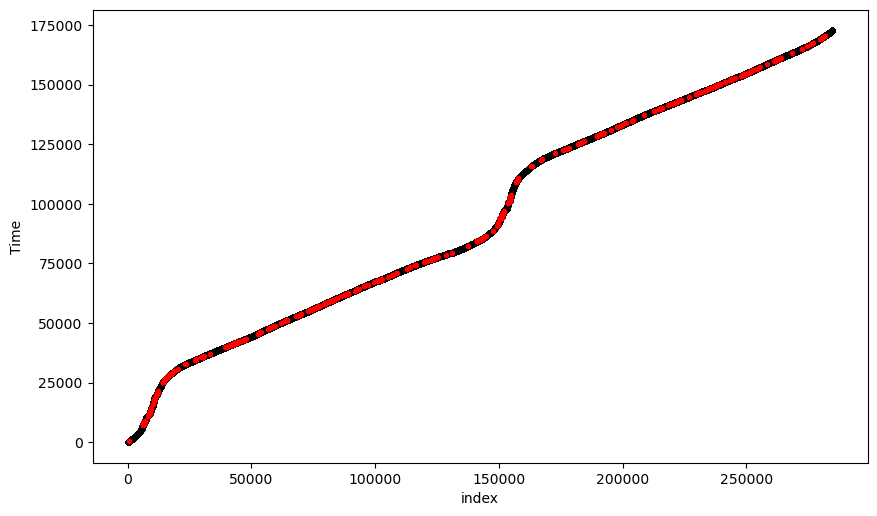

In [559]:
plotImbalancedSeries(X_tv,y_tv,'Time')

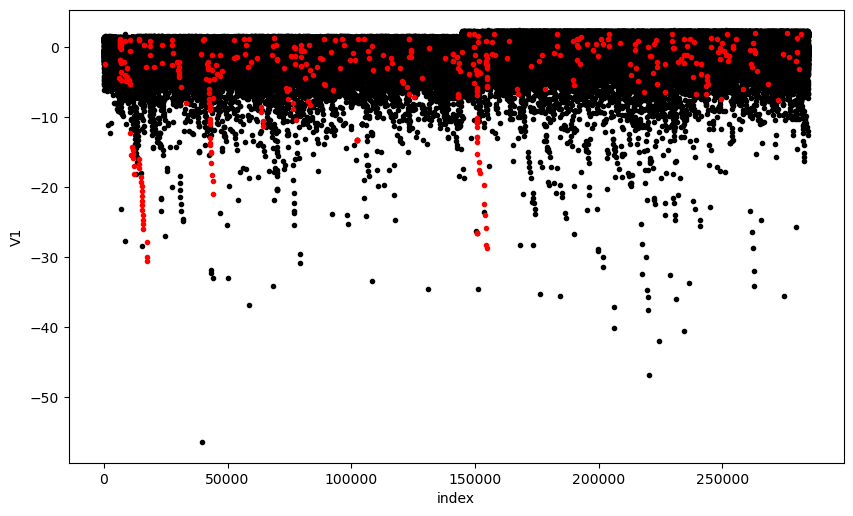

In [558]:
plotImbalancedSeries(X_tv,y_tv,'V1')

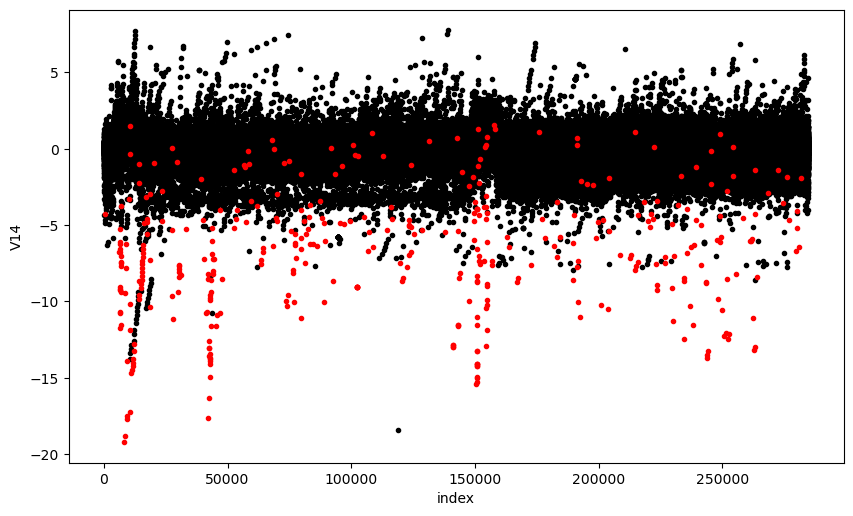

In [556]:
plotImbalancedSeries(X_tv,y_tv,'V14')

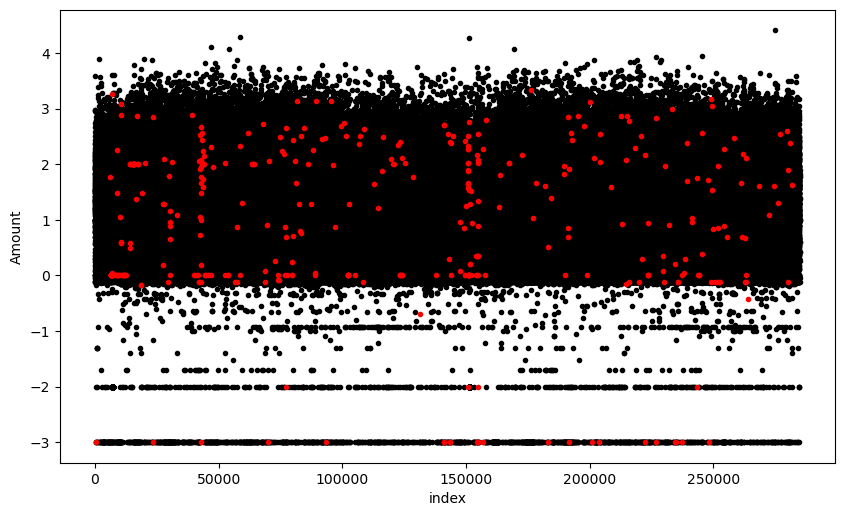

In [557]:
plotImbalancedSeries(X_tv,y_tv,'Amount')

## Univariate CDFs

In [17]:
def cdf(ps0):
    ps1 = ps0.sort_values()
    repMin = ps1.iloc[:1]
    ps1 = (pd.concat([repMin,ps1],axis=0)).rename('x')
    cdf_values = pd.Series([(j/len(ps0)) for j in range(len(ps0)+1)],index=ps1.index).rename('CDF')
    return(pd.concat([ps1,cdf_values],axis=1))

In [18]:
QWE = cdf(seriesTransform(tv1,'Amount'))

In [19]:
QWE.head()

,x,CDF
141257,-3.0,0.000000
141257,-3.0,0.002538
237107,-3.0,0.005076
154587,-3.0,0.007614
201098,-3.0,0.010152


In [562]:
def plotImbalancedCDFs(X,y,field,options=None):
    if (options is None):
        options = {'colors':[[0,0,0],[1,0,0]]}
    cdf_0 = cdf(seriesTransform(X[y==0],field))
    cdf_1 = cdf(seriesTransform(X[y==1],field))
    plt.plot(cdf_0.x,cdf_0.CDF,'.',color=options['colors'][0])
    plt.plot(cdf_1.x,cdf_1.CDF,'.',color=options['colors'][1])
    plt.ylabel('CDF')
    plt.xlabel(field)
    plt.show()

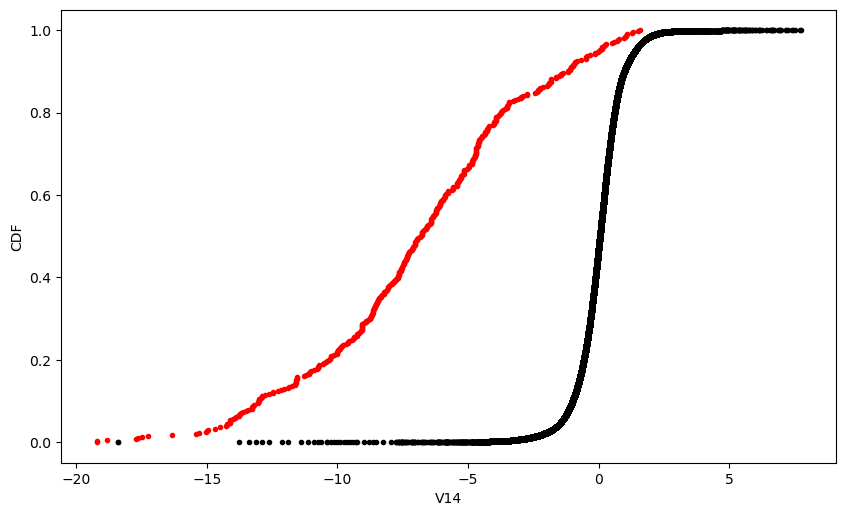

In [563]:
plotImbalancedCDFs(X_tv,y_tv,'V14')

## Exploration: Bivariate

In [567]:
def scatterTwoFields_Imbalanced(X,y,field0,field1,options=None):
    if (options is None):
        options = {'colors':[[0,0,0],[1,0,0]]}
    plt.plot(seriesTransform(X[y==0],field0),seriesTransform(X[y==0],field1),'.',color=options['colors'][0])
    plt.plot(seriesTransform(X[y==1],field0),seriesTransform(X[y==1],field1),'.',color=options['colors'][1])
    plt.ylabel(field1)
    plt.xlabel(field0)
    plt.show()

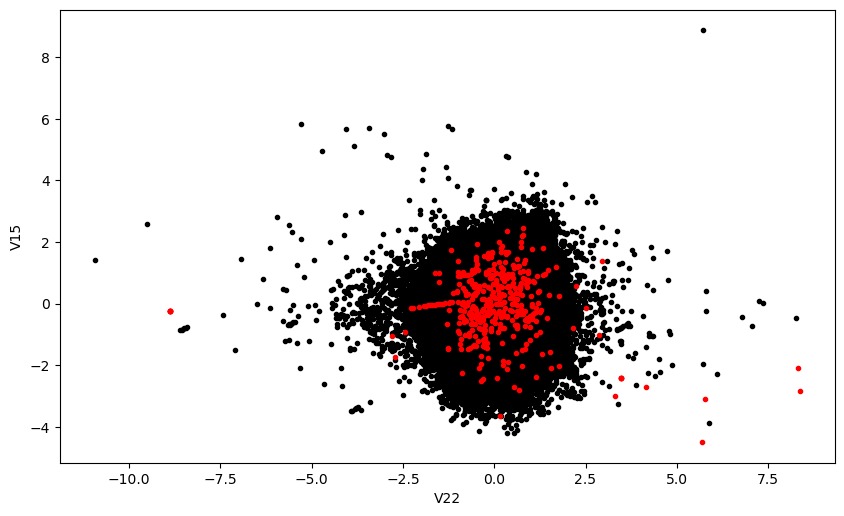

In [568]:
scatterTwoFields_Imbalanced(X_tv,y_tv,'V22','V15')

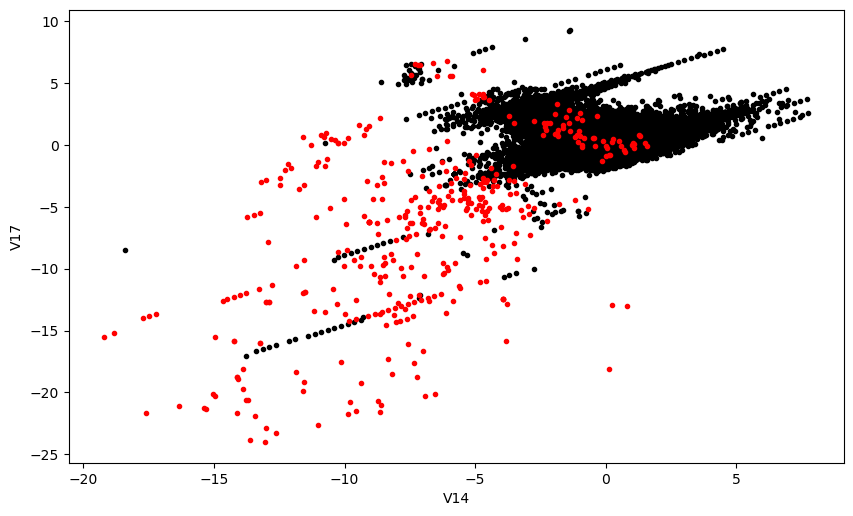

In [570]:
scatterTwoFields_Imbalanced(X_tv,y_tv,'V14','V17')

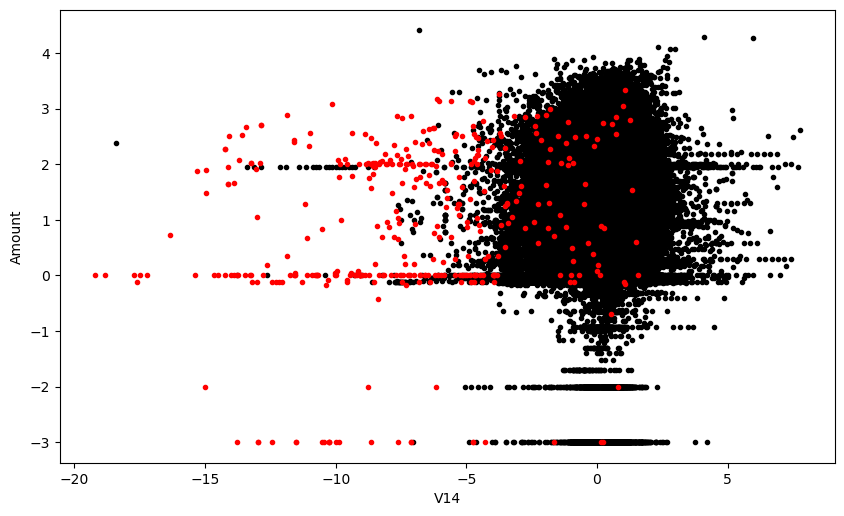

In [571]:
scatterTwoFields_Imbalanced(X_tv,y_tv,'V14','Amount')

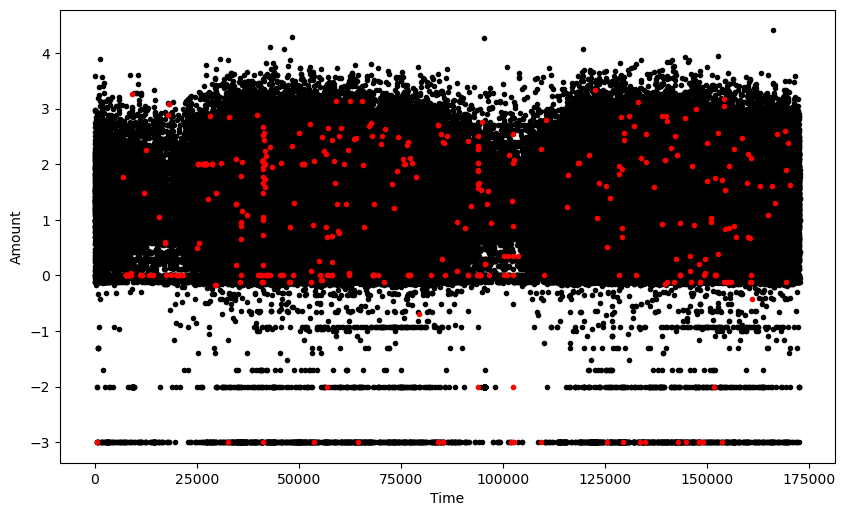

In [572]:
scatterTwoFields_Imbalanced(X_tv,y_tv,'Time','Amount')

In [67]:
# Verifying that the V_n features are PCA output:

df[df.Class<40].corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

# Supervised ML: Single-Feature Sort

Baseline: It seems we might do okay just by looking at individual PCs that have shown strong class separation

e.g. V14

Let's consider just using scaled V14 directly as a confidence value.

AUPRC considers all thresholds, so only the sort ordering matters.

In [26]:
# Min-Max Scaling
preds_m0_V14 = (tv_df.V14-tv_df.V14.max())/(tv_df.V14.min()-tv_df.V14.max())
preds_m0_V14.head()

77847     0.322759
47704     0.291569
109546    0.260655
197986    0.244690
260998    0.300043
Name: V14, dtype: float64

In [583]:
def plotMinMaxScaledVsIndex(X,y,field,flip,options=None):
    if (options is None):
        options = {'colors':[[0,0,0],[1,0,0]]}
    ps = seriesTransform(X,field)
    (psMin,psMax) = (ps.max(),ps.min()) if flip else (ps.min(),ps.max())
    plt.plot((ps[y==0]-psMin)/(psMax-psMin),'.',color=options['colors'][0])
    plt.plot((ps[y==1]-psMin)/(psMax-psMin),'.',color=options['colors'][1])
    plt.ylabel('Confidence given by %s' % field)
    plt.xlabel('index')
    plt.show()    

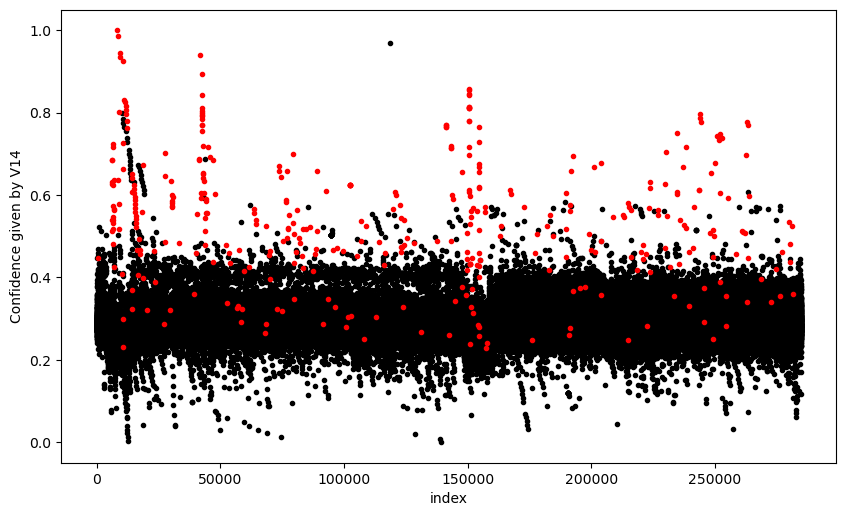

In [584]:
plotMinMaxScaledVsIndex(X_tv,y_tv,'V14',flip=True)

Let's build a custom sklearn pipeline to perform any needed preprocessing then fit a model.

In [157]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [114]:
class AmountTransformer(BaseEstimator,TransformerMixin):
    def __init__(self,myFloor=0.001):
        self.floor=myFloor
        
    def fit(self,X,y=None):
        return(self)
        
    def transform(self,X,y=None):
        X_ = X.copy()
        if 'Amount' in X.columns:
            X_.Amount = np.log10(X_.Amount.apply(lambda x: max(x,self.floor)))
        return(X_)

In [70]:
# verify AmountTransformer() works:
pipe0 = Pipeline([('amt_tx',AmountTransformer(myFloor=0.005))])
df9 = train_df.head().copy()
df9.at[121392,'Amount'] = 0.00
_ = pipe0.fit(df9)
pipe0.transform(df9)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
171406,120623.0,-0.984629,1.414785,1.142971,0.721923,0.341204,0.300499,0.306724,0.637640,-0.507866,-0.550513,-1.443815,-0.361680,-0.661963,0.511432,0.519812,-0.229372,0.094195,-0.210358,1.038043,0.042764,-0.485255,-1.440586,-0.085621,0.302629,0.350915,-0.845549,0.210625,0.074265,0.000000,0
50930,44708.0,-4.686662,3.284455,-1.260573,0.283085,-3.713478,-0.364052,-2.859323,3.536301,-0.077482,-0.520877,-0.106201,2.016687,0.017443,1.828058,-0.882568,1.098935,0.951901,0.594046,0.159057,-0.570473,0.320571,0.016018,0.271662,0.544310,0.036979,0.212491,-1.176372,-0.306610,1.630631,0
121392,76175.0,-1.173649,0.636961,1.143740,-0.503729,-0.492146,-0.562572,0.795793,0.424550,-0.919000,-0.921945,1.056623,0.794539,-0.051821,0.679481,-0.323120,0.837916,-0.738078,0.069298,-0.314985,0.108486,-0.067052,-0.753516,0.402676,0.292369,-0.421691,-0.101075,-0.118677,0.044447,-2.301030,0
24193,33111.0,-0.490202,0.631620,1.481300,1.094980,0.458802,-0.029032,0.226646,0.239776,-0.802914,0.078970,1.224848,0.068797,-1.048204,0.744883,0.900545,-0.396553,-0.020066,0.410081,0.584804,0.023049,0.279840,0.744216,-0.129144,0.014592,-0.319697,-0.202935,0.168859,0.144563,0.477121,0
43834,41670.0,0.091415,0.496080,1.594352,1.738100,0.028156,0.269313,0.326573,-0.057416,0.160143,0.113772,-0.618425,-0.081564,-0.508855,-0.233107,0.594905,-1.497220,0.807700,-0.449058,1.360342,0.130510,0.026178,0.537444,-0.105691,0.106715,-0.266194,-0.122100,-0.022336,-0.170998,1.173186,0


In [83]:
pipe1 = Pipeline([('amt_tx',AmountTransformer(myFloor=0.005)),('std_normz',StandardScaler())])
_=pipe1.fit(X_tv)

In [95]:
preprocessed_tv = pd.DataFrame(pipe1.transform(X_tv),index=X_tv.index,columns=X_tv.columns)

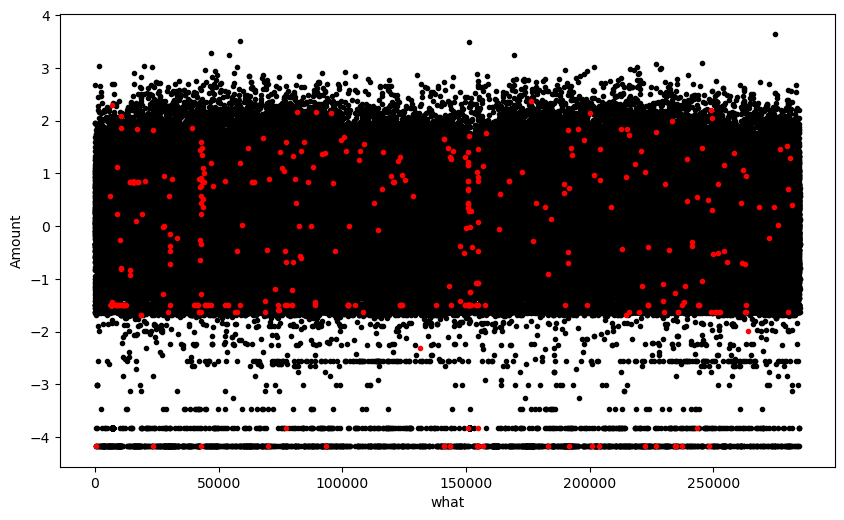

In [103]:
col = 'Amount'
plt.plot(preprocessed_tv[col][y_tv==0],'k.')
plt.plot(preprocessed_tv[col][y_tv==1],'r.')
plt.ylabel(col)
plt.xlabel('what')
plt.show()

In [104]:
# Std scaling still leaves a lot of values far from zero. Could revisit if this seems like a problem later.
# But verified that this is behaving as designed.

In [105]:
# Build a trivial logistic regression model, using only one feature directly as the confidence value.
# Try V14, which seemed to provide decent class separation.
# It will be a monotonic function of the single variable.

In [130]:
pipe2 = Pipeline([('amt_tx',AmountTransformer(myFloor=0.005)),
                  ('std_normz',StandardScaler()),
                 ('logisticRegression',LogisticRegression(penalty='none',fit_intercept=True,class_weight='balanced'))])
_=pipe2.fit(X_train[['V14']],y_train)

In [177]:
preds2=pipe2.predict(X_val[['V14']])
decFunc2 = pipe2.decision_function(X_val[['V14']])

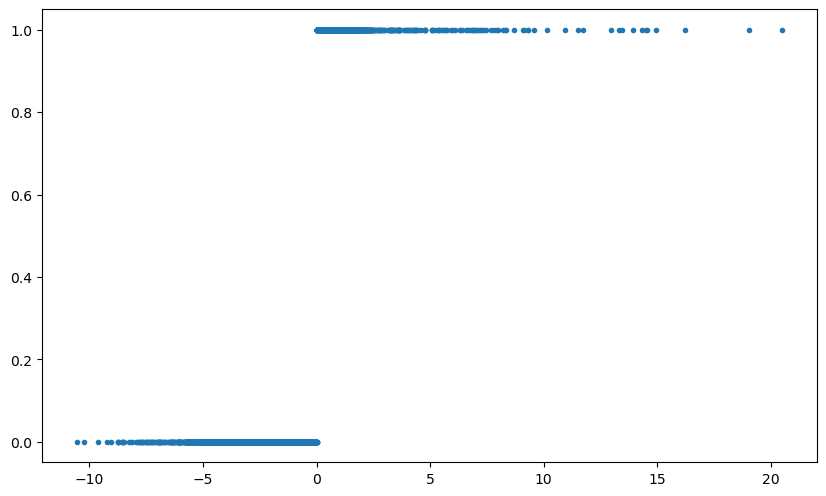

In [178]:
plt.plot(decFunc2,preds2,'.')

In [163]:
print((len(preds2),sum(preds2)))

(45569, 1284)


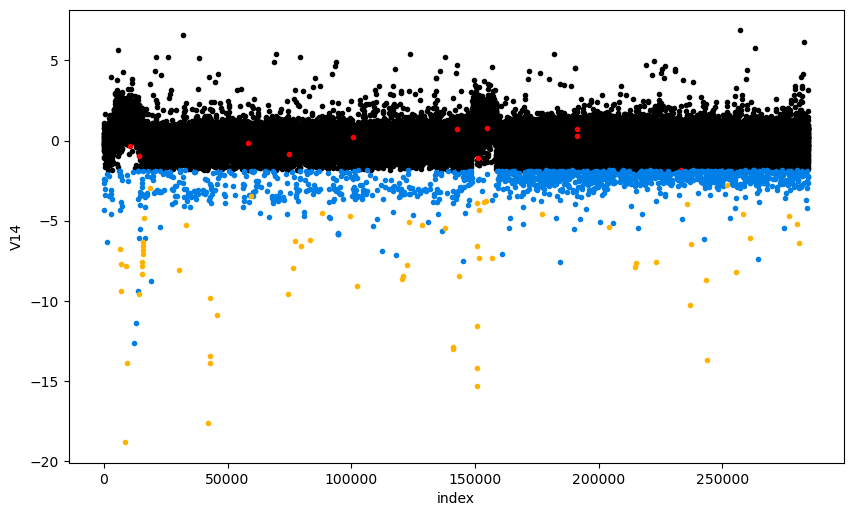

In [587]:
col = 'V14'
plt.plot(X_val[col][(preds2==0) & (y_val==0)],'k.')
plt.plot(X_val[col][(preds2==0) & (y_val==1)],'r.')
plt.plot(X_val[col][(preds2==1) & (y_val==0)],'.',color=[0,0.5,0.9])
plt.plot(X_val[col][(preds2==1) & (y_val==1)],'.',color=[1,0.7,0])
plt.ylabel(col)
plt.xlabel('index')
plt.show()

In [164]:
preds2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

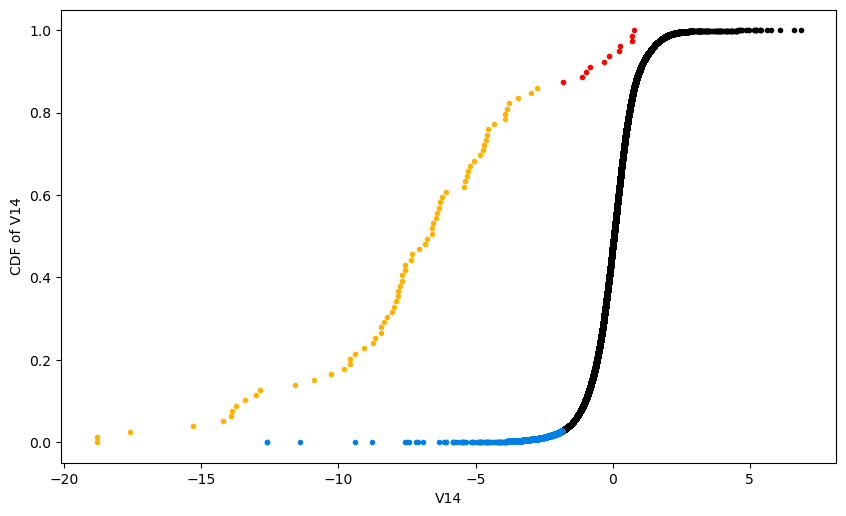

In [156]:
col = 'V14'
cdf_0 = cdf(X_val[col][y_val==0])
cdf_1 = cdf(X_val[col][y_val==1])

threshold_V14_balanced = 0.5*(X_val.V14[preds==1].max() + X_val.V14[preds==0].min())
        # not robust to new data: need to flip if predictor increases with class 
plt.plot(cdf_0.x[cdf_0.x>threshold_V14_balanced],cdf_0.CDF[cdf_0.x>threshold_V14_balanced],'k.')
plt.plot(cdf_1.x[cdf_1.x>threshold_V14_balanced],cdf_1.CDF[cdf_1.x>threshold_V14_balanced],'r.')
plt.plot(cdf_0.x[cdf_0.x<=threshold_V14_balanced],cdf_0.CDF[cdf_0.x<=threshold_V14_balanced],'.',color=[0,0.5,0.9])
plt.plot(cdf_1.x[cdf_1.x<=threshold_V14_balanced],cdf_1.CDF[cdf_1.x<=threshold_V14_balanced],'.',color=[1,0.7,0])
plt.ylabel('CDF of V14')
plt.xlabel('V14')
plt.show()

In [165]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,preds2)

array([[44274,  1216],
       [   11,    68]], dtype=int64)

In [166]:
from sklearn.metrics import classification_report
print(classification_report(y_val,preds2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     45490
           1       0.05      0.86      0.10        79

    accuracy                           0.97     45569
   macro avg       0.53      0.92      0.54     45569
weighted avg       1.00      0.97      0.98     45569



In [181]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

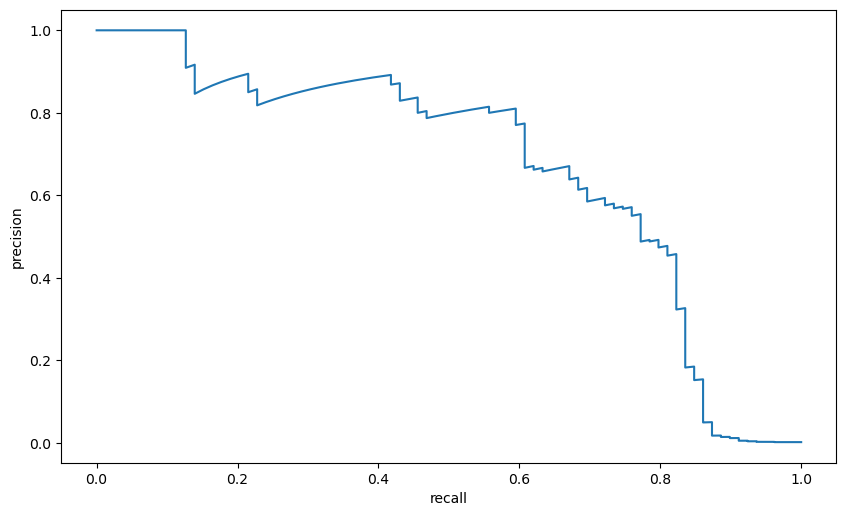

In [183]:
(precis2,recall2,thresh2) = precision_recall_curve(y_val, decFunc2)
plt.plot(recall2,precis2)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [185]:
print(auc(recall2,precis2))
print(average_precision_score(y_val,decFunc2))

0.6681924055357462
0.6699344653399216


# Logistic Regression

In [189]:
pipe3 = Pipeline([('amt_tx',AmountTransformer(myFloor=0.005)),
                  ('std_normz',StandardScaler()),
                 ('logisticRegression',LogisticRegression(penalty='none',fit_intercept=True,class_weight='balanced'))])
_=pipe3.fit(X_train,y_train)

In [190]:
preds3=pipe3.predict(X_val)
decFunc3 = pipe3.decision_function(X_val)

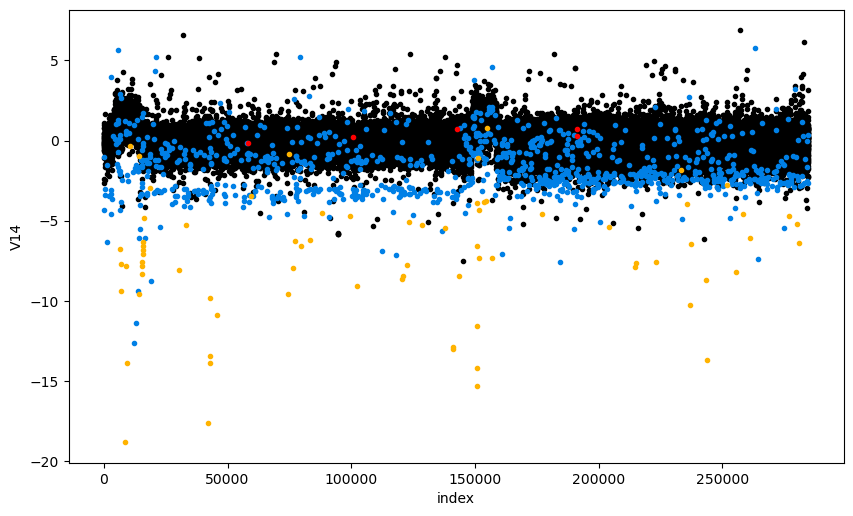

In [588]:
col = 'V14'
plt.plot(X_val[col][(preds3==0) & (y_val==0)],'k.')
plt.plot(X_val[col][(preds3==1) & (y_val==0)],'.',color=[0,0.5,0.9])
plt.plot(X_val[col][(preds3==0) & (y_val==1)],'.',color=[1,0,0])
plt.plot(X_val[col][(preds3==1) & (y_val==1)],'.',color=[1.0,0.7,0.0])
plt.ylabel(col)
plt.xlabel('index')
plt.show()

In [214]:
#Metrics
confusion_matrix(y_val,preds3)

array([[44429,  1061],
       [    5,    74]], dtype=int64)

In [217]:
print(classification_report(y_val,preds3))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     45490
           1       0.07      0.94      0.12        79

    accuracy                           0.98     45569
   macro avg       0.53      0.96      0.56     45569
weighted avg       1.00      0.98      0.99     45569



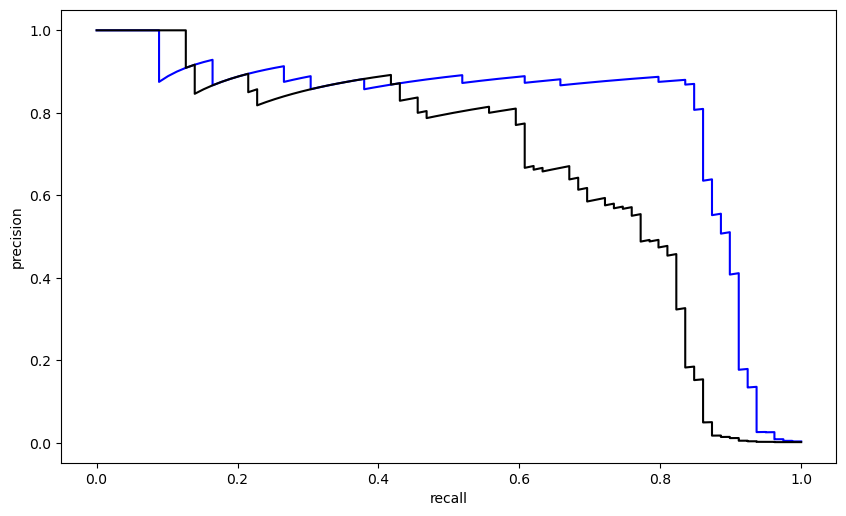

In [220]:
(precis3,recall3,thresh3) = precision_recall_curve(y_val, decFunc3)
plt.plot(recall3,precis3,'b')
plt.plot(recall2,precis2,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [221]:
print(auc(recall3,precis3))
print(average_precision_score(y_val,decFunc3))

0.8002516150277891
0.8018112769445926


In [226]:
# Fascinating. Not bad. And we haven't done any tuning yet.

In [227]:
# Tuning: Some tuning options are irrelevant, since our perf metric doesn't use a threshold.
# Our performance metric depends only on our ability to return a SORT that best separates out fraud vs legit
    # score is weighted evenly across all possible thresholds that could be implemented on that sorted list of confidences
    


In [ ]:
# Choose tuning considerations accordingly. 
# i.e. class_weight is irrelevant

# biggest one is penalty

In [255]:
pipe3 = Pipeline([('amt_tx',AmountTransformer(myFloor=0.005)),
                  ('std_normz',StandardScaler()),
                 ('logisticRegression',LogisticRegression(
                         penalty='l2',fit_intercept=True,class_weight='balanced',solver='lbfgs',C=0.01))])
_=pipe3.fit(X_train,y_train)

In [254]:
preds3=pipe3.predict(X_val)
decFunc3 = pipe3.decision_function(X_val)
(precis3,recall3,thresh3) = precision_recall_curve(y_val, decFunc3)
print(auc(recall3,precis3))

0.8002426694062891


In [ ]:
# penalty='l2'  ===                     0.8002
#                 C=0.01:               0.8032

# Random Forests

In [258]:
from sklearn.ensemble import RandomForestClassifier

In [260]:
import time

In [269]:
import multiprocessing
multiprocessing.cpu_count()

8

In [ ]:
# RandomForest using default parameters

In [267]:
tic=time.process_time()
pipe4 = Pipeline([('rafo',RandomForestClassifier(n_jobs=-1))])
_=pipe4.fit(X_train,y_train)
print('Processing time (s):')
print(time.process_time()-tic)

Processing time (s):
213.75


In [273]:
preds4=pipe4.predict_proba(X_val)

In [589]:
preds4[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [592]:
print(len(preds4),sum(preds4[:,1]>0))

45569 1146


In [291]:
for fraudProbability in preds4[:,1]:
    if (fraudProbability>0):
        print(fraudProbability)
# these are all exactly an integer divided by 100.
# Because the confidence values are given by a vote amongst trees

0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.93
0.02
0.97
0.01
0.02
0.03
0.01
0.01
0.01
0.01
0.03
0.01
0.02
0.01
0.01
0.01
0.01
0.01
0.95
0.89
0.01
0.01
0.01
0.01
0.01
0.01
1.0
0.01
0.01
0.01
0.01
0.01
0.01
0.06
0.01
0.02
0.01
0.02
0.03
0.01
0.01
0.01
0.01
0.02
0.01
0.01
0.02
0.01
0.02
0.01
0.01
0.01
0.01
0.44
0.01
0.01
0.01
0.01
0.01
0.04
0.02
0.02
0.01
0.02
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.3
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.94
0.01
0.03
0.01
0.01
0.01
0.02
0.01
0.01
0.01
0.01
0.9
0.01
0.01
0.03
0.01
0.03
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.82
0.01
0.01
0.03
0.01
0.01
0.01
0.01
0.02
0.95
0.01
0.01
0.01
0.03
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.02
0.61
0.01
0.01
0.02
0.06
0.02
0.01
0.02
0.01
0.01
0.01
0.02
0.01
0.01
0.01
0.01
0.03
0.01
0.01
0.01
0.01
0.01
0.01
1.0
0.04
0.02
0.01
0.02
0.01
0.01
0.01
0.03
0.01
0.01
0.02
0.02
0.01
0.89
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.08
0.02
0.01
0.01
0.01
0.01
0.01
0.01

In [295]:
from collections import Counter
(sorted(list(Counter(preds4[:,1]).items()),key=lambda x: x[0]))

[(0.0, 44423),
 (0.01, 814),
 (0.02, 156),
 (0.03, 47),
 (0.04, 18),
 (0.05, 8),
 (0.06, 6),
 (0.07, 4),
 (0.08, 4),
 (0.09, 1),
 (0.1, 1),
 (0.11, 2),
 (0.12, 2),
 (0.17, 1),
 (0.19, 1),
 (0.21, 1),
 (0.26, 1),
 (0.3, 1),
 (0.34, 1),
 (0.35, 1),
 (0.36, 1),
 (0.39, 2),
 (0.44, 1),
 (0.52, 1),
 (0.55, 1),
 (0.58, 1),
 (0.61, 2),
 (0.63, 1),
 (0.65, 1),
 (0.69, 2),
 (0.7, 1),
 (0.71, 2),
 (0.73, 3),
 (0.75, 1),
 (0.78, 2),
 (0.79, 1),
 (0.81, 2),
 (0.82, 3),
 (0.84, 2),
 (0.85, 1),
 (0.87, 2),
 (0.89, 3),
 (0.9, 5),
 (0.91, 3),
 (0.92, 2),
 (0.93, 3),
 (0.94, 2),
 (0.95, 4),
 (0.96, 2),
 (0.97, 4),
 (0.98, 2),
 (0.99, 3),
 (1.0, 10)]

In [ ]:
# Predictions are discretized to integers/100 because they are a vote amongst 100 trees

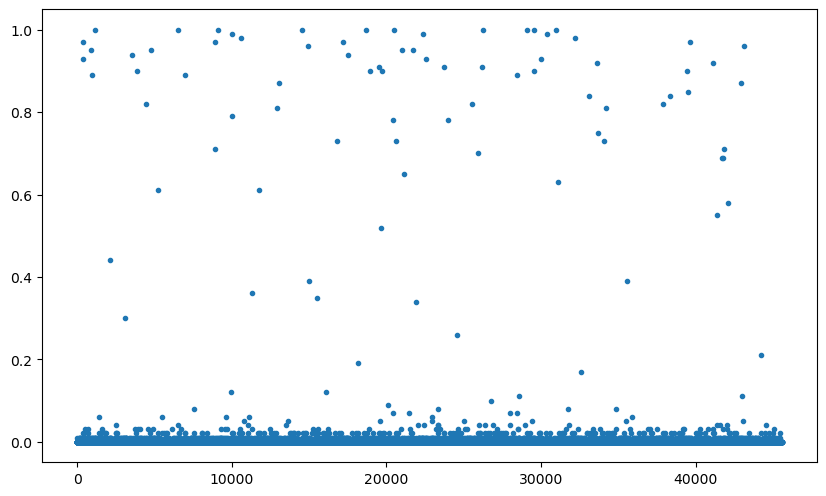

In [347]:
plt.plot(preds4[:,1],'.')

In [271]:
preds4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

72

In [307]:
(precis4,recall4,thresh4) = precision_recall_curve(y_val,preds4[:,1])

In [308]:
thresh4

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.17, 0.19, 0.21, 0.26, 0.3 , 0.34, 0.35, 0.36, 0.39,
       0.44, 0.52, 0.55, 0.58, 0.61, 0.63, 0.65, 0.69, 0.7 , 0.71, 0.73,
       0.75, 0.78, 0.79, 0.81, 0.82, 0.84, 0.85, 0.87, 0.89, 0.9 , 0.91,
       0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ])

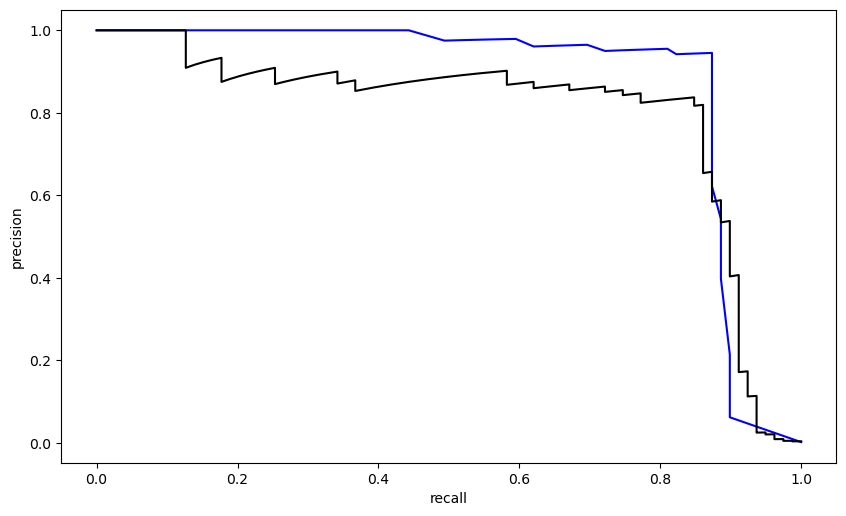

In [311]:
(precis4,recall4,thresh4) = precision_recall_curve(y_val,preds4[:,1])
plt.plot(recall4,precis4,'b')
plt.plot(recall3,precis3,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [312]:
print(auc(recall4,precis4))

0.87259184454908


## More trees

In [297]:
tic=time.process_time()
pipe5 = Pipeline([('rafo',RandomForestClassifier(n_estimators=1000,n_jobs=-1))])
_=pipe5.fit(X_train,y_train)
print('Processing time (s):')
print(time.process_time()-tic)

Processing time (s):
2229.09375


In [298]:
preds5=pipe5.predict_proba(X_val)

In [300]:
preds5[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [301]:
from collections import Counter
(sorted(list(Counter(preds5[:,1]).items()),key=lambda x: x[0]))

[(0.0, 40512),
 (0.001, 2601),
 (0.002, 929),
 (0.003, 462),
 (0.004, 245),
 (0.005, 150),
 (0.006, 103),
 (0.007, 79),
 (0.008, 58),
 (0.009, 53),
 (0.01, 38),
 (0.011, 27),
 (0.012, 22),
 (0.013, 29),
 (0.014, 19),
 (0.015, 16),
 (0.016, 16),
 (0.017, 11),
 (0.018, 12),
 (0.019, 12),
 (0.02, 8),
 (0.021, 7),
 (0.022, 5),
 (0.023, 7),
 (0.024, 6),
 (0.025, 3),
 (0.026, 2),
 (0.027, 5),
 (0.028, 3),
 (0.03, 3),
 (0.031, 3),
 (0.032, 1),
 (0.033, 2),
 (0.034, 3),
 (0.036, 4),
 (0.037, 1),
 (0.039, 1),
 (0.04, 2),
 (0.043, 1),
 (0.044, 1),
 (0.045, 2),
 (0.046, 1),
 (0.048, 2),
 (0.049, 1),
 (0.052, 1),
 (0.054, 1),
 (0.055, 1),
 (0.057, 1),
 (0.063, 1),
 (0.064, 2),
 (0.066, 1),
 (0.069, 1),
 (0.079, 1),
 (0.083, 1),
 (0.086, 1),
 (0.087, 1),
 (0.095, 2),
 (0.121, 1),
 (0.129, 1),
 (0.153, 1),
 (0.169, 1),
 (0.2, 1),
 (0.203, 1),
 (0.287, 1),
 (0.293, 1),
 (0.321, 1),
 (0.339, 1),
 (0.346, 1),
 (0.364, 1),
 (0.418, 1),
 (0.421, 1),
 (0.487, 1),
 (0.489, 1),
 (0.547, 1),
 (0.557, 1),
 (0

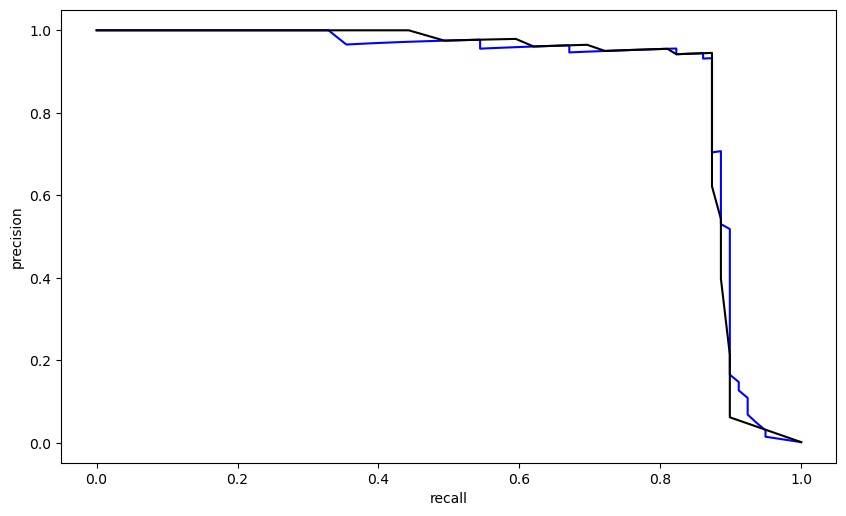

In [313]:
(precis5,recall5,thresh5) = precision_recall_curve(y_val,preds5[:,1])
plt.plot(recall5,precis5,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [314]:
print(auc(recall5,precis5))

0.8729323419553877


## class_weight = 'balanced'

In [302]:
tic=time.process_time()
pipe42 = Pipeline([('rafo',RandomForestClassifier(n_estimators=100,n_jobs=-1,class_weight='balanced'))])
_=pipe42.fit(X_train,y_train)
print('Processing time (s):')
print(time.process_time()-tic)

Processing time (s):
116.09375


In [304]:
preds42=pipe42.predict_proba(X_val)
(sorted(list(Counter(preds42[:,1]).items()),key=lambda x: x[0]))

[(0.0, 44557),
 (0.01, 754),
 (0.02, 113),
 (0.03, 20),
 (0.04, 21),
 (0.05, 13),
 (0.06, 3),
 (0.07, 2),
 (0.08, 2),
 (0.1, 1),
 (0.11, 1),
 (0.14, 2),
 (0.15, 1),
 (0.17, 1),
 (0.21, 2),
 (0.25, 1),
 (0.27, 1),
 (0.29, 1),
 (0.34, 2),
 (0.37, 1),
 (0.41, 1),
 (0.43, 1),
 (0.47, 1),
 (0.48, 1),
 (0.49, 1),
 (0.51, 1),
 (0.52, 1),
 (0.54, 1),
 (0.55, 1),
 (0.61, 2),
 (0.63, 1),
 (0.69, 1),
 (0.7, 1),
 (0.71, 1),
 (0.73, 1),
 (0.74, 1),
 (0.75, 1),
 (0.77, 1),
 (0.78, 1),
 (0.79, 1),
 (0.8, 3),
 (0.81, 1),
 (0.83, 3),
 (0.84, 1),
 (0.85, 4),
 (0.86, 1),
 (0.87, 1),
 (0.9, 2),
 (0.91, 1),
 (0.92, 2),
 (0.93, 3),
 (0.94, 4),
 (0.95, 1),
 (0.96, 2),
 (0.97, 4),
 (0.98, 6),
 (0.99, 6),
 (1.0, 4)]

In [317]:
sum(preds42[:,1]>0.5)

65

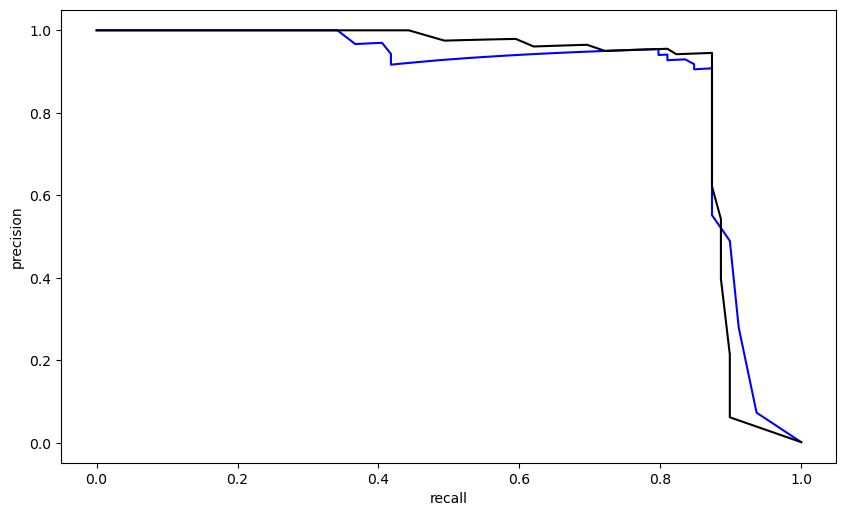

In [315]:
(precis42,recall42,thresh42) = precision_recall_curve(y_val,preds42[:,1])
plt.plot(recall42,precis42,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [316]:
print(auc(recall42,precis42))

0.867196043363128


## class_weight = 'balanced_subsample'

In [328]:
tic=time.process_time()
pipe43 = Pipeline([('rafo',RandomForestClassifier(n_estimators=100,n_jobs=-1,class_weight='balanced_subsample'))])
_=pipe43.fit(X_train,y_train)
print('Processing time (s):')
print(time.process_time()-tic)

Processing time (s):
124.203125


In [329]:
preds43=pipe43.predict_proba(X_val)
(sorted(list(Counter(preds43[:,1]).items()),key=lambda x: x[0]))

[(0.0, 44546),
 (0.01, 769),
 (0.02, 99),
 (0.03, 27),
 (0.04, 21),
 (0.05, 12),
 (0.06, 3),
 (0.07, 4),
 (0.08, 3),
 (0.09, 2),
 (0.1, 1),
 (0.12, 1),
 (0.13, 1),
 (0.17, 1),
 (0.18, 1),
 (0.23, 1),
 (0.27, 1),
 (0.29, 1),
 (0.3, 1),
 (0.34, 1),
 (0.35, 2),
 (0.43, 1),
 (0.45, 1),
 (0.48, 1),
 (0.52, 2),
 (0.54, 1),
 (0.55, 2),
 (0.58, 1),
 (0.61, 1),
 (0.63, 1),
 (0.65, 1),
 (0.68, 1),
 (0.71, 2),
 (0.72, 2),
 (0.77, 2),
 (0.78, 2),
 (0.79, 1),
 (0.8, 2),
 (0.81, 2),
 (0.82, 4),
 (0.83, 1),
 (0.84, 1),
 (0.86, 5),
 (0.87, 2),
 (0.88, 1),
 (0.89, 1),
 (0.91, 1),
 (0.92, 3),
 (0.93, 1),
 (0.94, 2),
 (0.95, 4),
 (0.96, 4),
 (0.97, 4),
 (0.98, 5),
 (0.99, 2),
 (1.0, 4)]

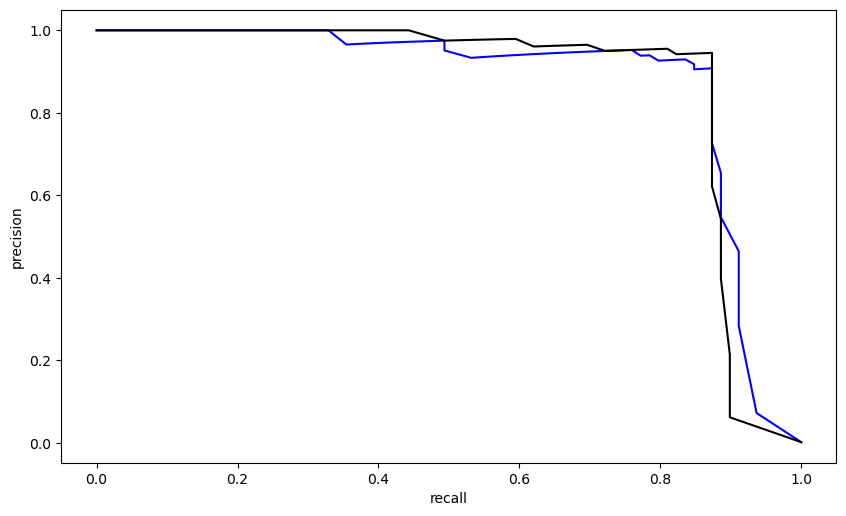

In [330]:
(precis43,recall43,thresh43) = precision_recall_curve(y_val,preds43[:,1])
plt.plot(recall43,precis43,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [348]:
print(auc(recall43,precis43))

0.8739457244731943


## imblearn library: BalancedRandomForestClassifier

In [334]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [335]:
tic=time.process_time()
pipe60 = Pipeline([('brafo',BalancedRandomForestClassifier(n_estimators=100,n_jobs=-1,class_weight=None))])
_=pipe60.fit(X_train,y_train)
print('Processing time (s):')
print(time.process_time()-tic)

Processing time (s):
7.359375


In [336]:
preds60=pipe60.predict_proba(X_val)
(sorted(list(Counter(preds60[:,1]).items()),key=lambda x: x[0]))

[(0.0, 4116),
 (0.01, 4472),
 (0.02, 3911),
 (0.03, 3368),
 (0.04, 2951),
 (0.05, 2502),
 (0.06, 2169),
 (0.07, 1690),
 (0.08, 1477),
 (0.09, 1284),
 (0.1, 1176),
 (0.11, 1054),
 (0.12, 987),
 (0.13, 852),
 (0.14, 872),
 (0.15, 769),
 (0.16, 776),
 (0.17, 696),
 (0.18, 657),
 (0.19, 645),
 (0.2, 610),
 (0.21, 534),
 (0.22, 499),
 (0.23, 458),
 (0.24, 390),
 (0.25, 408),
 (0.26, 367),
 (0.27, 349),
 (0.28, 321),
 (0.29, 303),
 (0.3, 323),
 (0.31, 274),
 (0.32, 236),
 (0.33, 264),
 (0.34, 229),
 (0.35, 213),
 (0.36, 189),
 (0.37, 230),
 (0.38, 185),
 (0.39, 184),
 (0.4, 181),
 (0.41, 175),
 (0.42, 153),
 (0.43, 150),
 (0.44, 135),
 (0.45, 121),
 (0.46, 108),
 (0.47, 103),
 (0.48, 104),
 (0.49, 101),
 (0.5, 91),
 (0.51, 65),
 (0.52, 84),
 (0.53, 77),
 (0.54, 59),
 (0.55, 56),
 (0.56, 48),
 (0.57, 52),
 (0.58, 44),
 (0.59, 45),
 (0.6, 45),
 (0.61, 42),
 (0.62, 32),
 (0.63, 37),
 (0.64, 41),
 (0.65, 28),
 (0.66, 41),
 (0.67, 26),
 (0.68, 38),
 (0.69, 19),
 (0.7, 26),
 (0.71, 26),
 (0.72, 16

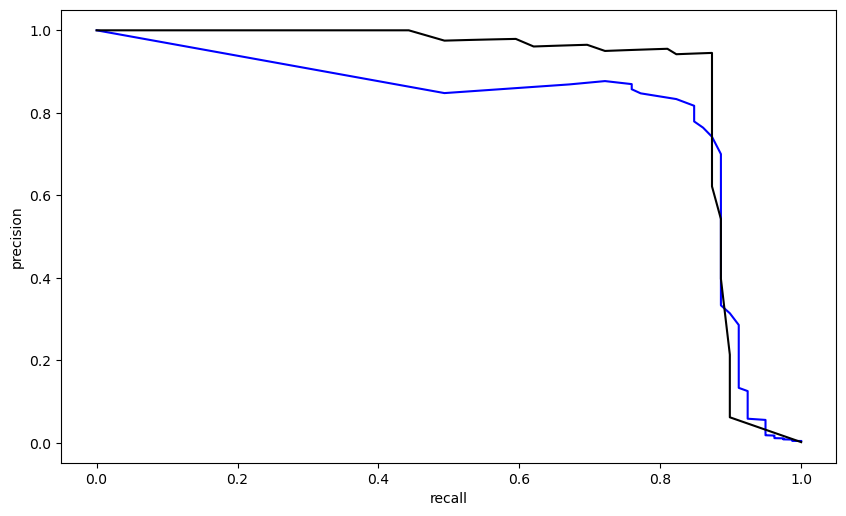

In [337]:
(precis60,recall60,thresh60) = precision_recall_curve(y_val,preds60[:,1])
plt.plot(recall60,precis60,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [338]:
print(auc(recall60,precis60))

0.7997344203993645


In [339]:
tic=time.process_time()
pipe61 = Pipeline([('brafo',BalancedRandomForestClassifier(n_estimators=1000,n_jobs=-1,class_weight=None))])
_=pipe61.fit(X_train,y_train)
print('Processing time (s):')
print(time.process_time()-tic)

Processing time (s):
74.921875


In [340]:
preds61=pipe61.predict_proba(X_val)
(sorted(list(Counter(preds61[:,1]).items()),key=lambda x: x[0]))

[(0.0, 58),
 (0.001, 186),
 (0.002, 313),
 (0.003, 419),
 (0.004, 511),
 (0.005, 588),
 (0.006, 581),
 (0.007, 558),
 (0.008, 540),
 (0.009, 559),
 (0.01, 587),
 (0.011, 535),
 (0.012, 518),
 (0.013, 520),
 (0.014, 452),
 (0.015, 472),
 (0.016, 476),
 (0.017, 466),
 (0.018, 452),
 (0.019, 453),
 (0.02, 461),
 (0.021, 425),
 (0.022, 415),
 (0.023, 414),
 (0.024, 413),
 (0.025, 431),
 (0.026, 400),
 (0.027, 431),
 (0.028, 377),
 (0.029, 420),
 (0.03, 379),
 (0.031, 359),
 (0.032, 348),
 (0.033, 366),
 (0.034, 389),
 (0.035, 305),
 (0.036, 314),
 (0.037, 308),
 (0.038, 362),
 (0.039, 336),
 (0.04, 305),
 (0.041, 315),
 (0.042, 309),
 (0.043, 271),
 (0.044, 313),
 (0.045, 296),
 (0.046, 279),
 (0.047, 269),
 (0.048, 279),
 (0.049, 247),
 (0.05, 272),
 (0.051, 258),
 (0.052, 251),
 (0.053, 257),
 (0.054, 220),
 (0.055, 240),
 (0.056, 215),
 (0.057, 226),
 (0.058, 196),
 (0.059, 222),
 (0.06, 235),
 (0.061, 220),
 (0.062, 220),
 (0.063, 217),
 (0.064, 202),
 (0.065, 209),
 (0.066, 218),
 (0.

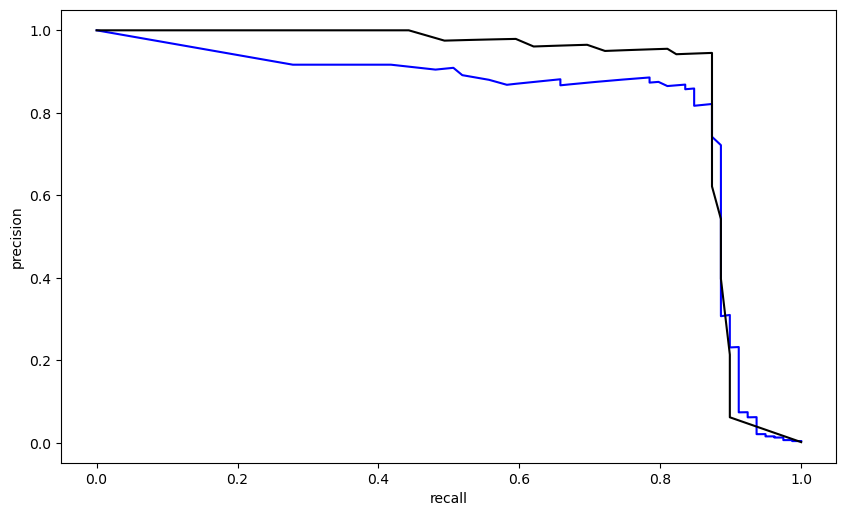

In [341]:
(precis61,recall61,thresh61) = precision_recall_curve(y_val,preds61[:,1])
plt.plot(recall61,precis61,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [342]:
print(auc(recall61,precis61))

0.8138933515425517


In [343]:
tic=time.process_time()
pipe62 = Pipeline([('brafo',BalancedRandomForestClassifier(n_estimators=1000,n_jobs=-1,class_weight='balanced_subsample'))])
_=pipe62.fit(X_train,y_train)
print('Processing time (s):')
print(time.process_time()-tic)

Processing time (s):
74.375


In [344]:
preds62=pipe62.predict_proba(X_val)
(sorted(list(Counter(preds62[:,1]).items()),key=lambda x: x[0]))

[(0.0, 50),
 (0.001, 161),
 (0.002, 314),
 (0.003, 469),
 (0.004, 550),
 (0.005, 576),
 (0.006, 562),
 (0.007, 610),
 (0.008, 559),
 (0.009, 518),
 (0.01, 521),
 (0.011, 535),
 (0.012, 535),
 (0.013, 484),
 (0.014, 562),
 (0.015, 493),
 (0.016, 481),
 (0.017, 463),
 (0.018, 459),
 (0.019, 433),
 (0.02, 405),
 (0.021, 424),
 (0.022, 404),
 (0.023, 414),
 (0.024, 433),
 (0.025, 440),
 (0.026, 412),
 (0.027, 420),
 (0.028, 416),
 (0.029, 368),
 (0.03, 368),
 (0.031, 372),
 (0.032, 386),
 (0.033, 369),
 (0.034, 339),
 (0.035, 336),
 (0.036, 351),
 (0.037, 361),
 (0.038, 342),
 (0.039, 308),
 (0.04, 284),
 (0.041, 295),
 (0.042, 302),
 (0.043, 320),
 (0.044, 261),
 (0.045, 273),
 (0.046, 280),
 (0.047, 274),
 (0.048, 251),
 (0.049, 286),
 (0.05, 239),
 (0.051, 247),
 (0.052, 208),
 (0.053, 258),
 (0.054, 227),
 (0.055, 217),
 (0.056, 249),
 (0.057, 205),
 (0.058, 215),
 (0.059, 193),
 (0.06, 219),
 (0.061, 207),
 (0.062, 213),
 (0.063, 196),
 (0.064, 229),
 (0.065, 211),
 (0.066, 200),
 (0.

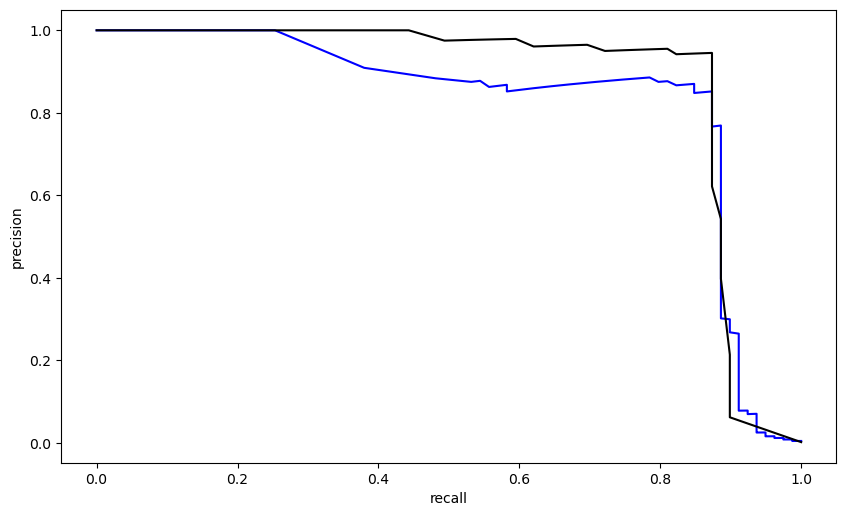

In [345]:
(precis62,recall62,thresh62) = precision_recall_curve(y_val,preds62[:,1])
plt.plot(recall62,precis62,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [346]:
print(auc(recall62,precis62))

0.8259265350424522


In [349]:
tic=time.process_time()
pipe63 = Pipeline([('brafo',BalancedRandomForestClassifier(n_estimators=10000,n_jobs=-1,class_weight='balanced_subsample'))])
_=pipe63.fit(X_train,y_train)
print('Processing time (s):')
print(time.process_time()-tic)

Processing time (s):
771.984375


In [350]:
preds63=pipe63.predict_proba(X_val)
# (sorted(list(Counter(preds63[:,1]).items()),key=lambda x: x[0]))

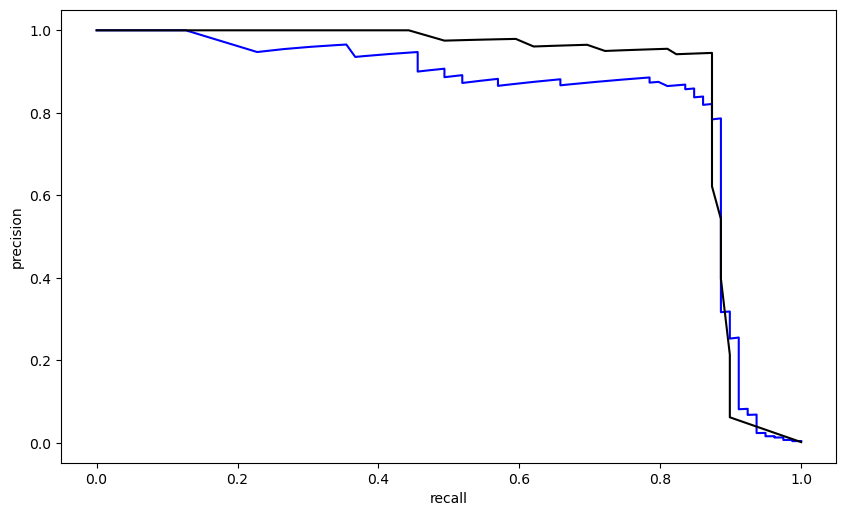

In [351]:
(precis63,recall63,thresh63) = precision_recall_curve(y_val,preds63[:,1])
plt.plot(recall63,precis63,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [352]:
print(auc(recall63,precis63))

0.8272847438224691


# Random Forests + SMOTE Augmentation

In [377]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [355]:
oversample = SMOTE()
(X_train_smote0,y_train_smote0) = oversample.fit_resample(X_train, y_train)

In [361]:
print(X_train.shape,sum(y_train))
print(X_train_smote0.shape,sum(y_train_smote0))

(182276, 30) 315
(363922, 30) 181961


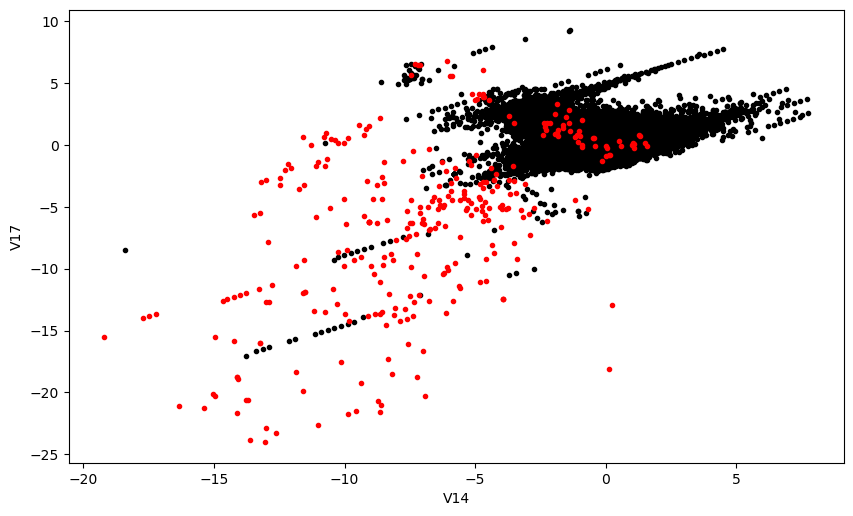

In [594]:
scatterTwoFields_Imbalanced(X_train,y_train,'V14','V17')

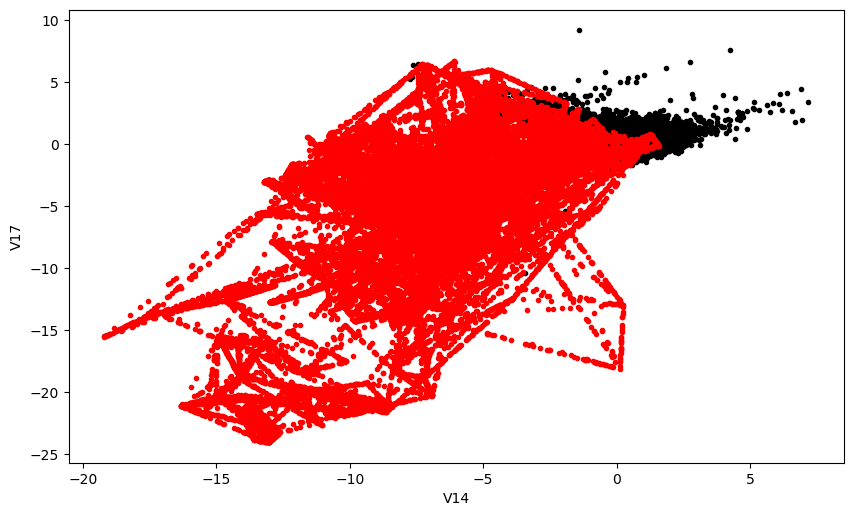

In [595]:
scatterTwoFields_Imbalanced(X_train_smote,y_train_smote,'V14','V17')

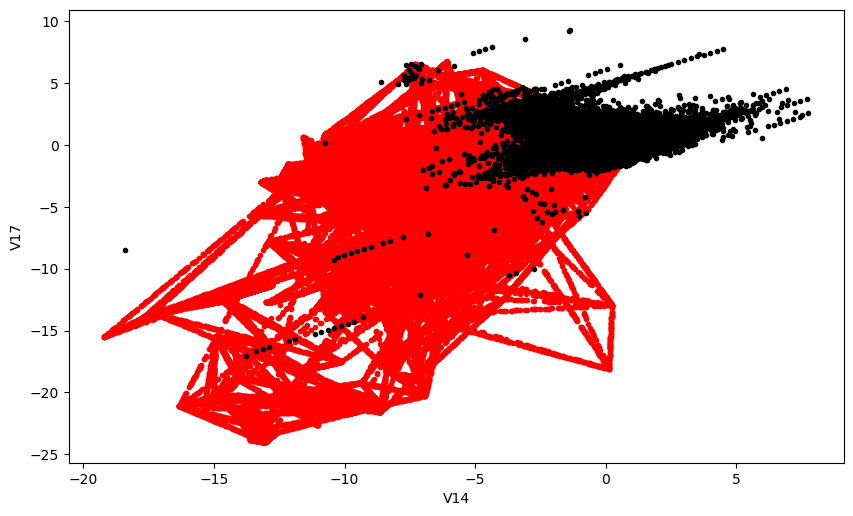

In [368]:
cols = ['V14','V17']
plt.plot(seriesTransform(X_train_smote0[y_train_smote0==1],cols[0]),
         seriesTransform(X_train_smote0[y_train_smote0==1],cols[1]),'r.')
plt.plot(seriesTransform(X_train_smote0[y_train_smote0==0],cols[0]),
         seriesTransform(X_train_smote0[y_train_smote0==0],cols[1]),'k.')
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.show()

In [369]:
tic=time.process_time()
pipe73 = Pipeline([('rafo',RandomForestClassifier(n_estimators=1000,n_jobs=-1,class_weight=None))])
_=pipe73.fit(X_train_smote0,y_train_smote0)
print('Processing time (s):')
print(time.process_time()-tic)

Processing time (s):
4382.1875


In [370]:
preds73=pipe73.predict_proba(X_val)
(sorted(list(Counter(preds73[:,1]).items()),key=lambda x: x[0]))

[(0.0, 29587),
 (0.001, 5903),
 (0.002, 2416),
 (0.003, 1479),
 (0.004, 1018),
 (0.005, 746),
 (0.006, 558),
 (0.007, 409),
 (0.008, 339),
 (0.009, 291),
 (0.01, 252),
 (0.011, 201),
 (0.012, 183),
 (0.013, 158),
 (0.014, 130),
 (0.015, 109),
 (0.016, 98),
 (0.017, 108),
 (0.018, 94),
 (0.019, 79),
 (0.02, 71),
 (0.021, 53),
 (0.022, 60),
 (0.023, 60),
 (0.024, 72),
 (0.025, 59),
 (0.026, 45),
 (0.027, 45),
 (0.028, 35),
 (0.029, 42),
 (0.03, 30),
 (0.031, 25),
 (0.032, 35),
 (0.033, 40),
 (0.034, 25),
 (0.035, 21),
 (0.036, 25),
 (0.037, 21),
 (0.038, 26),
 (0.039, 17),
 (0.04, 21),
 (0.041, 15),
 (0.042, 17),
 (0.043, 19),
 (0.044, 17),
 (0.045, 15),
 (0.046, 14),
 (0.047, 12),
 (0.048, 11),
 (0.049, 11),
 (0.05, 16),
 (0.051, 8),
 (0.052, 6),
 (0.053, 10),
 (0.054, 6),
 (0.055, 10),
 (0.056, 6),
 (0.057, 10),
 (0.058, 6),
 (0.059, 5),
 (0.06, 4),
 (0.061, 8),
 (0.062, 6),
 (0.063, 5),
 (0.064, 7),
 (0.065, 9),
 (0.066, 3),
 (0.067, 9),
 (0.068, 6),
 (0.069, 4),
 (0.07, 2),
 (0.071, 

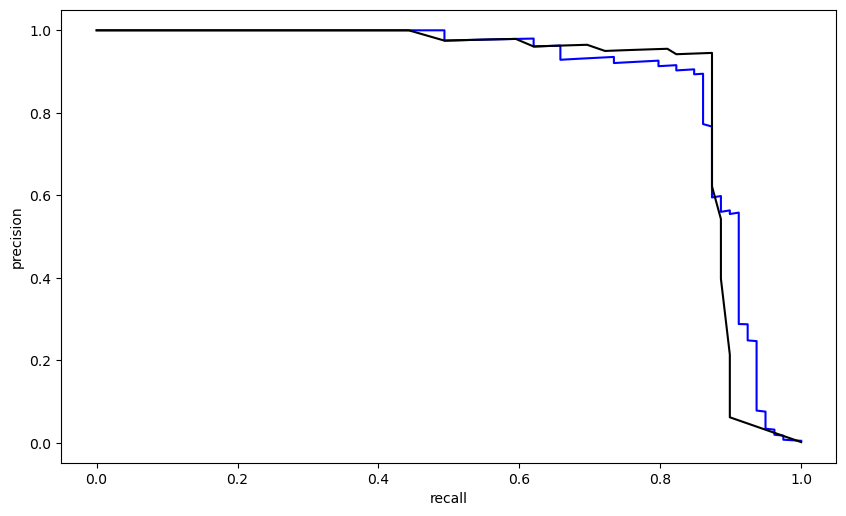

In [371]:
(precis73,recall73,thresh73) = precision_recall_curve(y_val,preds73[:,1])
plt.plot(recall73,precis73,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [372]:
print(auc(recall73,precis73))

0.8805710277683183


In [373]:
tic=time.process_time()
pipe72 = Pipeline([('rafo',RandomForestClassifier(n_estimators=100,n_jobs=-1,class_weight=None))])
_=pipe72.fit(X_train_smote0,y_train_smote0)
print('Processing time (s):')
print(time.process_time()-tic)

Processing time (s):
419.03125


In [374]:
preds72=pipe72.predict_proba(X_val)
(sorted(list(Counter(preds72[:,1]).items()),key=lambda x: x[0]))

[(0.0, 40262),
 (0.01, 3128),
 (0.02, 937),
 (0.03, 373),
 (0.04, 233),
 (0.05, 165),
 (0.06, 90),
 (0.07, 61),
 (0.08, 46),
 (0.09, 34),
 (0.1, 25),
 (0.11, 20),
 (0.12, 24),
 (0.13, 9),
 (0.14, 9),
 (0.15, 8),
 (0.16, 11),
 (0.17, 8),
 (0.18, 5),
 (0.19, 2),
 (0.2, 2),
 (0.21, 4),
 (0.22, 7),
 (0.23, 6),
 (0.24, 3),
 (0.25, 3),
 (0.26, 3),
 (0.27, 1),
 (0.28, 2),
 (0.29, 1),
 (0.3, 1),
 (0.31, 1),
 (0.32, 2),
 (0.33, 1),
 (0.34, 1),
 (0.35, 1),
 (0.47, 1),
 (0.51, 1),
 (0.55, 1),
 (0.57, 1),
 (0.58, 1),
 (0.6, 1),
 (0.66, 1),
 (0.69, 2),
 (0.7, 1),
 (0.75, 1),
 (0.76, 2),
 (0.81, 2),
 (0.82, 1),
 (0.83, 1),
 (0.88, 1),
 (0.9, 2),
 (0.92, 1),
 (0.95, 8),
 (0.96, 1),
 (0.97, 5),
 (0.98, 2),
 (0.99, 13),
 (1.0, 30)]

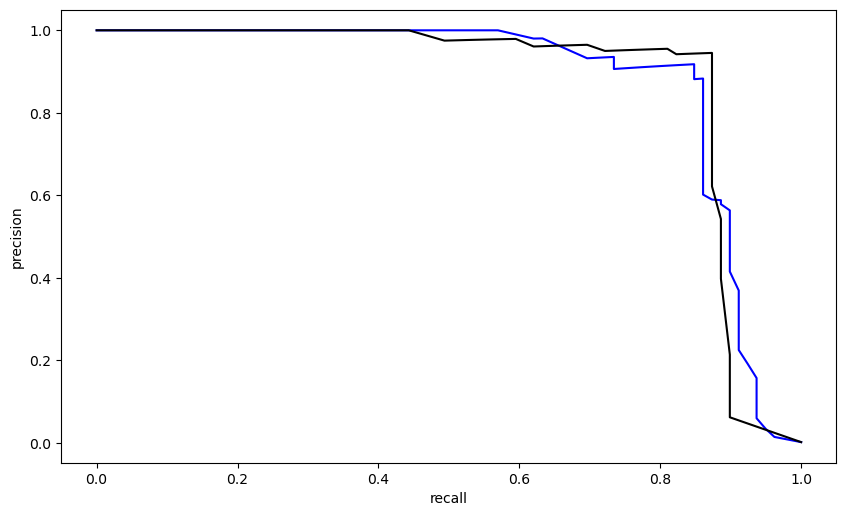

In [375]:
(precis72,recall72,thresh72) = precision_recall_curve(y_val,preds72[:,1])
plt.plot(recall72,precis72,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [376]:
print(auc(recall72,precis72))

0.876482929683862


Increasing number of trees doesn't buy much performance gain

## Modify SMOTE sampling strategy

In [408]:
oversample1 = SMOTE(sampling_strategy=0.2)
undersample1 = RandomUnderSampler(sampling_strategy=1.0)
print(X_train.shape,sum(y_train))
X_train_smote1,y_train_smote1 = oversample1.fit_resample(X_train,y_train)
print(X_train_smote1.shape,sum(y_train_smote1))
X_train_smote1,y_train_smote1 = undersample1.fit_resample(X_train_smote1,y_train_smote1)
print(X_train_smote1.shape,sum(y_train_smote1))

# Tried to implement this as pipeline, but encountered errors.

#steps = [('o', oversample1),('u',undersample1)]
#pipeline = Pipeline(steps=steps)
# transform the dataset
#X_train_smote1, y_train_smote1 = pipeline.fit(X_train, y_train)

(182276, 30) 315
(218353, 30) 36392
(72784, 30) 36392


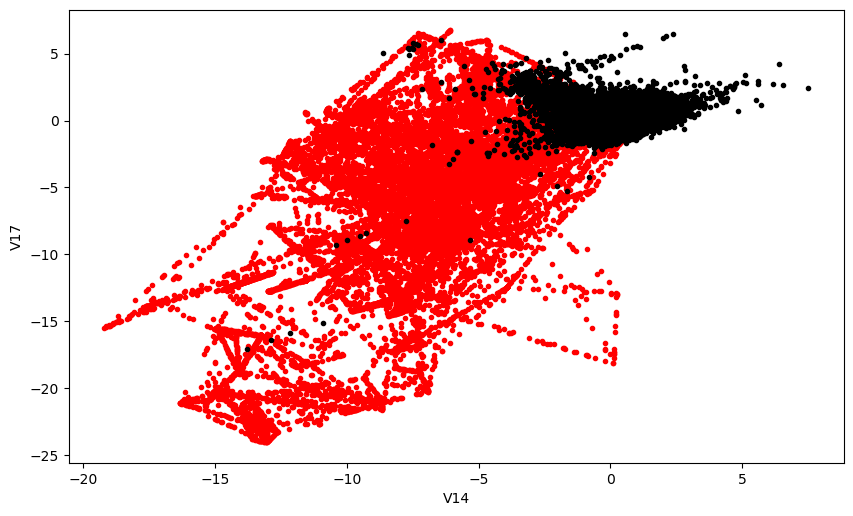

In [394]:
cols = ['V14','V17']
plt.plot(seriesTransform(X_train_smote1[y_train_smote1==1],cols[0]),
         seriesTransform(X_train_smote1[y_train_smote1==1],cols[1]),'r.')
plt.plot(seriesTransform(X_train_smote1[y_train_smote1==0],cols[0]),
         seriesTransform(X_train_smote1[y_train_smote1==0],cols[1]),'k.')
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.show()

In [409]:
tic=time.process_time()
pipe74 = Pipeline([('rafo',RandomForestClassifier(n_estimators=1000,n_jobs=-1,class_weight='balanced_subsample'))])
_=pipe74.fit(X_train_smote1,y_train_smote1)
print('Training time (s):')
print(time.process_time()-tic)

Training time (s):
514.796875


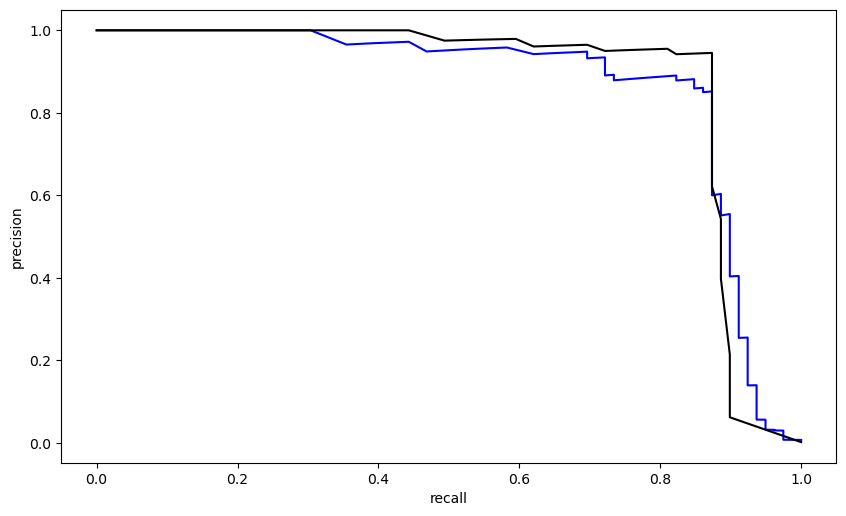

In [410]:
preds74=pipe74.predict_proba(X_val)

(precis74,recall74,thresh74) = precision_recall_curve(y_val,preds74[:,1])
plt.plot(recall74,precis74,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [411]:
print(auc(recall74,precis74))

0.8639364308541749


Reduction of SMOTE sample: quicker computation of 1000 trees, small loss of performance

## Different SMOTE bins for different trees

In [437]:
import warnings

for qwert in range(1):
#with warnings.catch_warnings():
    #warnings.simplefilter("ignore")
    tic=time.process_time()
    for j in range(100):
        if (not(j%10)):
            print((j,time.process_time()))
        X_train_smote11,y_train_smote11 = oversample1.fit_resample(X_train,y_train)
        X_train_smote11,y_train_smote11 = undersample1.fit_resample(X_train_smote11,y_train_smote11)
        pipe75 = Pipeline([('RF_oneTreeAtATime',
                            RandomForestClassifier(n_estimators=(j+1),n_jobs=-1,class_weight=None,warm_start=True))])
        _=pipe75.fit(X_train_smote1,y_train_smote1)
    print(time.process_time())
    print('Training time (s):')
    print(time.process_time()-tic)

(0, 12847.0625)
(10, 12875.1875)
(20, 12948.5625)
(30, 13066.953125)
(40, 13237.984375)
(50, 13460.421875)
(60, 13734.53125)
(70, 14058.59375)
(80, 14433.796875)
(90, 14863.78125)
15346.15625
Training time (s):
2499.09375


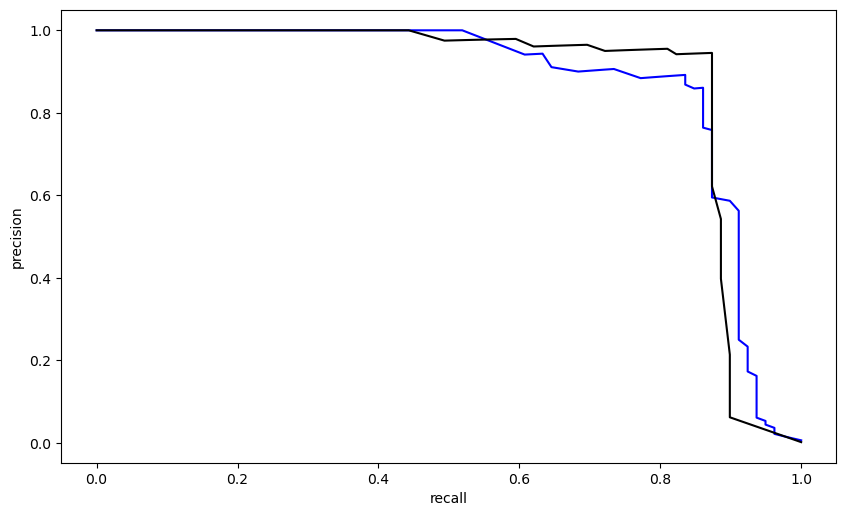

In [438]:
preds75=pipe75.predict_proba(X_val)

(precis75,recall75,thresh75) = precision_recall_curve(y_val,preds75[:,1])
plt.plot(recall75,precis75,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [439]:
print(auc(recall75,precis75))

0.8715074007312645


warm_start did not function as I expected. 

Computation time looks like O(number of existing trees)

Presumably the existing trees are being modified

Let's try the same idea, but implement it differently. Fit 100 separate tiny models (n_estimators=8), and store predictions iteratively in a numpy matrix.

In [420]:
numGroves76 = 100

oversample1 = SMOTE(sampling_strategy=0.2,random_state=73+j)
undersample1 = RandomUnderSampler(sampling_strategy=1.0,random_state=12345+j)
print(X_train.shape,sum(y_train))
X_train_smote,y_train_smote = oversample1.fit_resample(X_train,y_train)
print(X_train_smote.shape,sum(y_train_smote))
X_train_smote,y_train_smote = undersample1.fit_resample(X_train_smote,y_train_smote)
print(X_train_smote.shape,sum(y_train_smote))

forestPredictions = np.zeros((len(y_val),numGroves76))
print(forestPredictions.shape)

print()
tic = time.process_time()
for j in range(numGroves76):
    X_train_smote,y_train_smote = SMOTE(sampling_strategy=0.2,random_state=73+j).fit_resample(X_train,y_train)
    X_train_smote,y_train_smote = RandomUnderSampler(sampling_strategy=1.0,random_state=12345+j).fit_resample(
                                                                                            X_train_smote,y_train_smote)
    pipe76 = Pipeline([('RF_oneTree',RandomForestClassifier(n_estimators=8,n_jobs=-1))])
    _=pipe76.fit(X_train_smote,y_train_smote)
    forestPredictions[:,j]=pipe76.predict_proba(X_val)[:,1]
    if (not(j%10)):
        print((j,time.process_time()))
print('Training time (s):')
print(time.process_time()-tic)

(182276, 30) 315
(218353, 30) 36392
(72784, 30) 36392
(45569, 100)

(0, 12431.09375)
(10, 12472.53125)
(20, 12514.171875)
(30, 12555.40625)
(40, 12596.71875)
(50, 12637.734375)
(60, 12678.859375)
(70, 12720.734375)
(80, 12763.453125)
(90, 12805.265625)
Training time (s):
415.546875


In [442]:
Counter(forestPredictions[:,0])

Counter({0.0: 42699,
         0.125: 2191,
         0.25: 389,
         1.0: 66,
         0.375: 140,
         0.625: 22,
         0.875: 9,
         0.5: 45,
         0.75: 8})

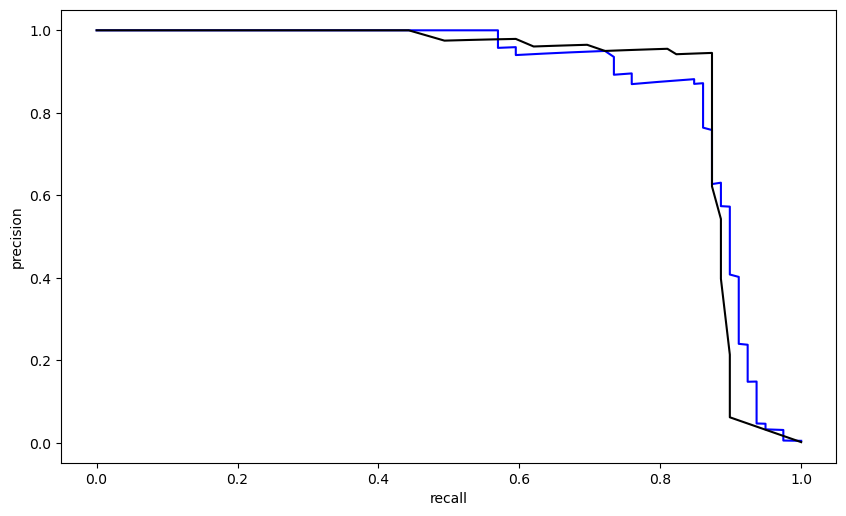

In [443]:
preds76=np.mean(forestPredictions,axis=1)

(precis76,recall76,thresh76) = precision_recall_curve(y_val,preds76)
plt.plot(recall76,precis76,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [444]:
print(auc(recall76,precis76))

0.8731420695058449


# Borderline SMOTE

In [425]:
from imblearn.over_sampling import BorderlineSMOTE
oversample2 = BorderlineSMOTE()
(X_train_BL0,y_train_BL0) = oversample.fit_resample(X_train, y_train)
print(X_train_BL0.shape,sum(y_train_BL0))

(363922, 30) 181961


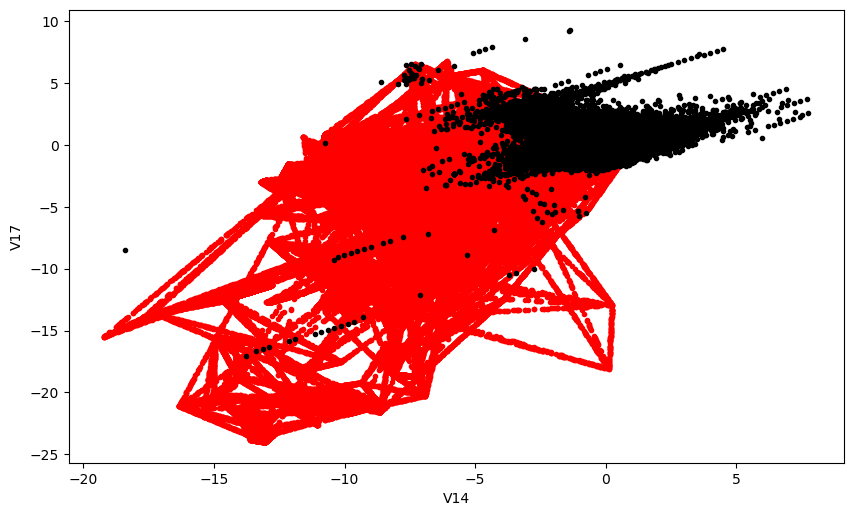

In [426]:
cols = ['V14','V17']
plt.plot(seriesTransform(X_train_BL0[y_train_BL0==1],cols[0]),
         seriesTransform(X_train_BL0[y_train_BL0==1],cols[1]),'r.')
plt.plot(seriesTransform(X_train_BL0[y_train_BL0==0],cols[0]),
         seriesTransform(X_train_BL0[y_train_BL0==0],cols[1]),'k.')
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.show()

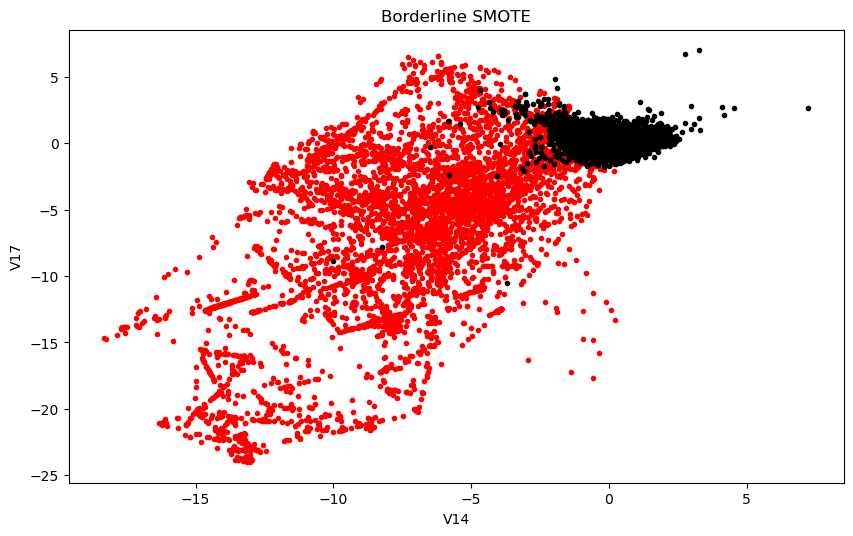

In [597]:
cols = ['V14','V17']
showFraction = 0.03
mask = np.random.rand(len(y_train_BL0))<showFraction
plt.plot(seriesTransform(X_train_BL0[mask & (y_train_BL0==1)],cols[0]),
         seriesTransform(X_train_BL0[mask & (y_train_BL0==1)],cols[1]),'r.')
plt.plot(seriesTransform(X_train_BL0[mask & (y_train_BL0==0)],cols[0]),
         seriesTransform(X_train_BL0[mask & (y_train_BL0==0)],cols[1]),'k.')
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.title('Borderline SMOTE')
plt.show()

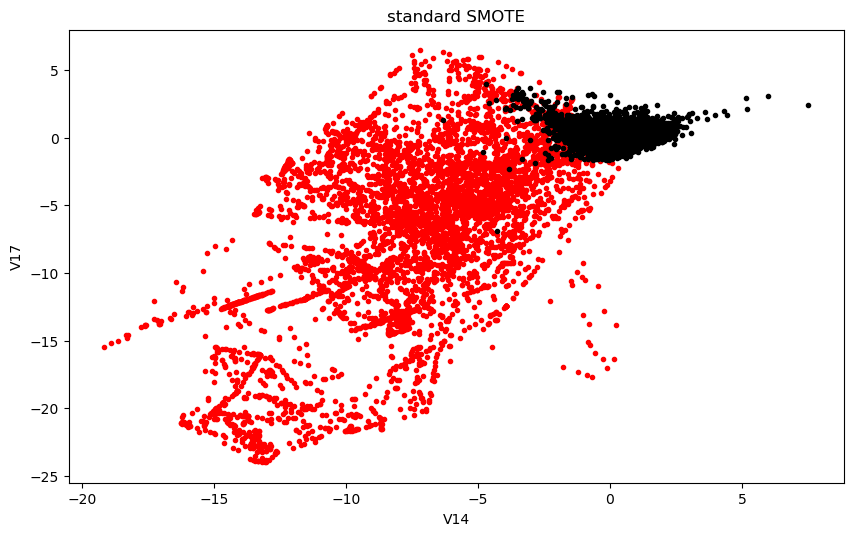

In [598]:
cols = ['V14','V17']
showFraction = 0.03
mask = np.random.rand(len(y_train_smote0))<showFraction
plt.plot(seriesTransform(X_train_smote0[mask & (y_train_smote0==1)],cols[0]),
         seriesTransform(X_train_smote0[mask & (y_train_smote0==1)],cols[1]),'r.')
plt.plot(seriesTransform(X_train_smote0[mask & (y_train_smote0==0)],cols[0]),
         seriesTransform(X_train_smote0[mask & (y_train_smote0==0)],cols[1]),'k.')
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.title('standard SMOTE')
plt.show()

Doesn't look like Borderline SMOTE has changed much

In [447]:
numGroves77=100
# get size:
forestPredictions77 = np.zeros((len(y_val),numGroves77))

tic=time.process_time()
for j in range(numGroves77):
    oversample2 = BorderlineSMOTE(random_state = 123+j)
    X_train_BL2,y_train_BL2 = oversample2.fit_resample(X_train,y_train)
    pipe77 = Pipeline([('RF_oneTreeAtATime',
                        RandomForestClassifier(n_estimators=8,n_jobs=-1,class_weight=None,random_state=234+j))])
    _=pipe77.fit(X_train_BL2,y_train_BL2)
    forestPredictions77[:,j]=pipe77.predict_proba(X_val)[:,1]
    if (not(j%10)):
        print((j,time.process_time()-tic))
print(time.process_time())
print('Training time (s):')
print(time.process_time()-tic)

(0, 31.4375)
(10, 373.25)
(20, 724.21875)
(30, 1076.3125)
(40, 1443.125)
(50, 1805.390625)
(60, 2164.78125)
(70, 2522.21875)
(80, 2918.71875)
(90, 3330.125)
21782.65625
Training time (s):
3688.90625


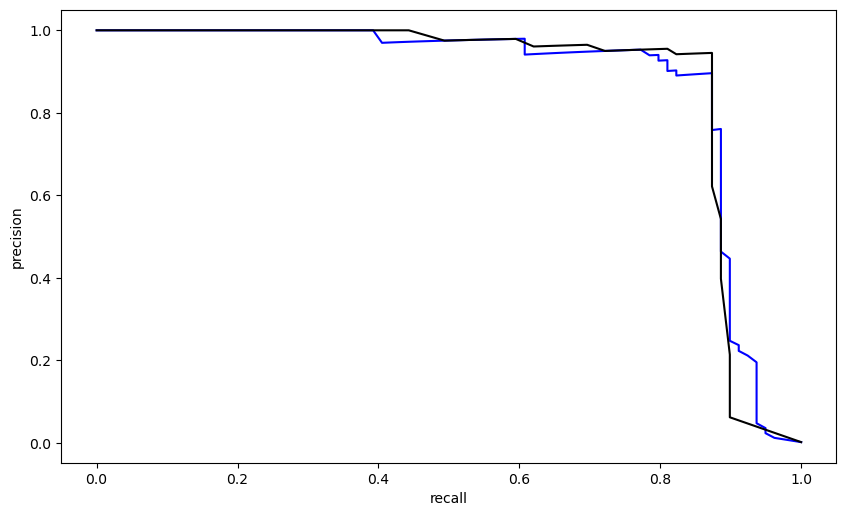

In [448]:
preds77=np.mean(forestPredictions77,axis=1)

(precis77,recall77,thresh77) = precision_recall_curve(y_val,preds77)
plt.plot(recall77,precis77,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [449]:
print(auc(recall77,precis77))

0.87536984165078


Training time has increased by 9x over standard SMOTE. Trees are presumably deeper.

# RUSBoost

In [451]:
from imblearn.ensemble import RUSBoostClassifier
rusboost80 = RUSBoostClassifier(n_estimators=100, sampling_strategy=1.0,
                                      algorithm='SAMME.R',random_state=12345, replacement=True)
_=rusboost80.fit(X_train, y_train)
y80 = rusboost80.predict_proba(X_val)

In [464]:
probabilities80 = rusboost80.predict_proba(X_val)[:,1]

In [465]:
probabilities80.shape

(45569,)

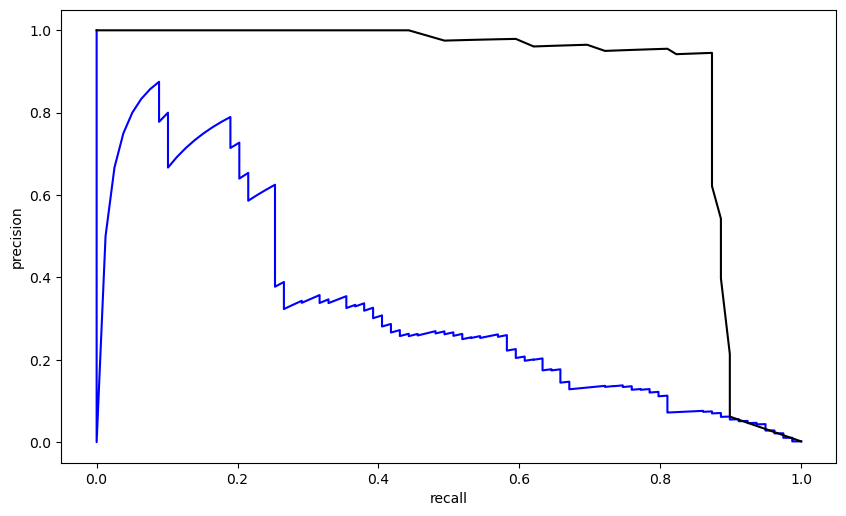

In [466]:
(precis80,recall80,thresh80) = precision_recall_curve(y_val,probabilities80)
plt.plot(recall80,precis80,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

# Gradient-Boosted Trees

In [472]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [533]:
(X_train_smote3,y_train_smote3) = BorderlineSMOTE(random_state=123).fit_resample(X_train,y_train)
pipe90 = Pipeline([('HGB',HistGradientBoostingClassifier(max_iter=1000,loss='binary_crossentropy',
                                                         l2_regularization=100.0,random_state=345))])

tic=time.process_time()
_=pipe90.fit(X_train_smote3,y_train_smote3)
print('Process time (s):')
print(time.process_time()-tic)

Process time (s):
671.53125


In [534]:
y90 = pipe90.predict_proba(X_val)[:,1]

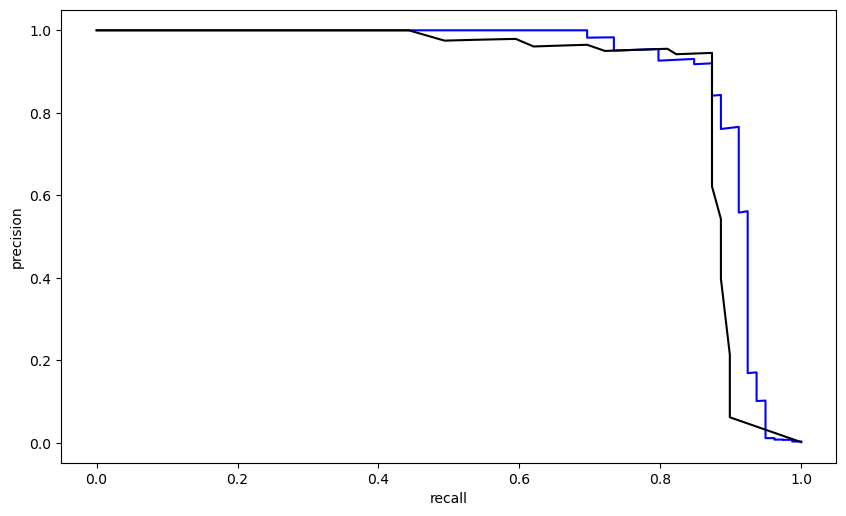

In [535]:
(precis90,recall90,thresh90) = precision_recall_curve(y_val,y90)
plt.plot(recall90,precis90,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [536]:
print(auc(recall90,precis90))

0.9049896882524153


# Moment of Truth: Test Set Performance

In [ ]:
# Let's evaluate several models:
    # Single-Variable Sort:                                            pipe2
    # Logistic Regression (all Features):                              pipe3
    # Random Forest (100 trees, class_weight='balanced_subsample'):    pipe43:                      
    # Random Forest + standard SMOTE   (defaults):                     pipe73:
    # Random Forest + Borderline SMOTE (defaults):                     pipe77: iterative in numpy, model not saved
    # Gradient Boosted Trees (max_iter=1000,l2_regularization=100.0):  pipe90

In [602]:
# ReTrain pipe77 to generate test_set predictions:
numGroves77=100
# get size:
forestPredictions_test77 = np.zeros((len(y_test),numGroves77))

tic=time.process_time()
for j in range(numGroves77):
    oversample2 = BorderlineSMOTE(random_state = 123+j)
    X_train_BL2,y_train_BL2 = oversample2.fit_resample(X_train,y_train)
    pipe77 = Pipeline([('RF_oneTreeAtATime',
                        RandomForestClassifier(n_estimators=8,n_jobs=-1,class_weight=None,random_state=234+j))])
    _=pipe77.fit(X_train_BL2,y_train_BL2)
    forestPredictions_test77[:,j]=pipe77.predict_proba(X_test)[:,1]
    if (not(j%10)):
        print((j,time.process_time()-tic))
print(time.process_time())
print('Training time (s):')
print(time.process_time()-tic)

(0, 31.59375)
(10, 377.28125)
(20, 736.4375)
(30, 1097.3125)
(40, 1464.515625)
(50, 1826.796875)
(60, 2186.421875)
(70, 2540.265625)
(80, 2906.046875)
(90, 3268.8125)
30045.6875
Training time (s):
3589.203125


In [603]:
y_77 = np.mean(forestPredictions_test77,axis=1)

In [610]:
modelNames = ['V14','logisticRegression','randomForest','randomForestSmote','randomForestBorderlineSmote','HistGradientBoost']
pipes = [pipe2,pipe3,pipe43,pipe73,None,pipe90]
testPredictions = [(P.predict_proba(X_test)[:,1] if P else None) for P in pipes]
testPredictions = [(y_77 if (modelNames[j]=='randomForestBorderlineSmote') else testPredictions[j]) for j in range(len(pipes))]
PRT = [precision_recall_curve(y_test,TP) for TP in testPredictions]


In [618]:
val_AUC = [auc(recall2,precis2),auc(recall3,precis3),auc(recall43,precis43),auc(recall73,precis73),
              auc(recall77,precis77),auc(recall90,precis90)]
print(val_AUC)

[0.6681924055357462, 0.8002426694062891, 0.8739457244731943, 0.8805710277683183, 0.87536984165078, 0.9049896882524153]


In [622]:
print('Final AUPRC:')
print(' Val    Test ')
print('-----   -----')
for j in range(len(modelNames)):
    print('%0.3f  %0.3f    %s' % (val_AUC[j],auc(PRT[j][1],PRT[j][0]),modelNames[j]))

Final AUPRC:
 Val    Test 
-----   -----
0.668  0.743    V14
0.800  0.732    logisticRegression
0.874  0.832    randomForest
0.881  0.837    randomForestSmote
0.875  0.822    randomForestBorderlineSmote
0.905  0.843    HistGradientBoost
